In [1]:
import sys
sys.path.append(r"C:\Users\maya620d\PycharmProjects\Spermatogensis\/")

from nucleosome_breath import NucleosomeBreath
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import concurrent.futures
import random


## MMC Simulation

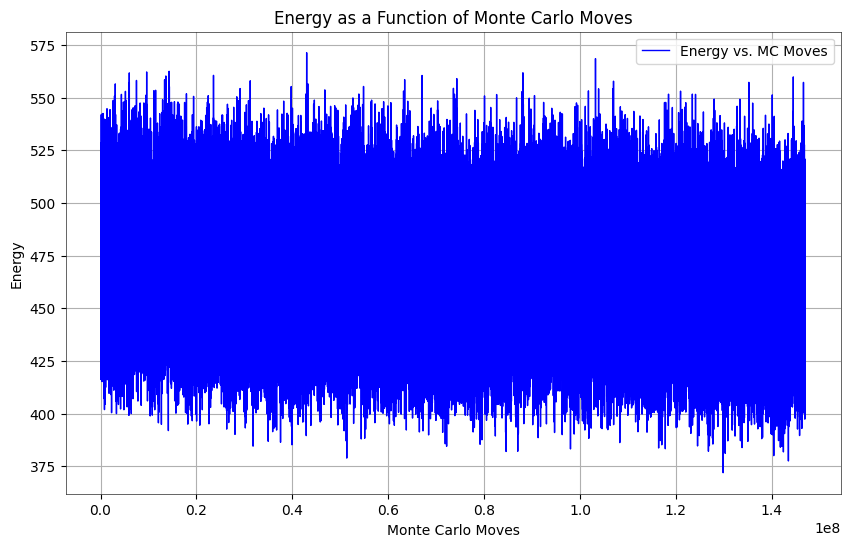

In [44]:
every = 10
first = 4000
moves = []
energies = []

with open(r"C:\Users\maya620d\PycharmProjects\NucleosomeMMC\energies.dat", "r") as file:
    for line in file:
        move, energy = map(float, line.split())
        moves.append(move)
        energies.append(energy)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(moves[first::every], energies[first::every], label="Energy vs. MC Moves", color='b', linewidth=1)
plt.xlabel("Monte Carlo Moves")
plt.ylabel("Energy")
plt.title("Energy as a Function of Monte Carlo Moves")
plt.legend()
plt.grid()
plt.show()


In [45]:

red = energies[first::every]
print(np.mean(red))
print(np.std(red)/np.sqrt(len(red)))


465.7609224986264
0.01854471640571919


## Thermodynamic Intergration

In [17]:
every = 10
first = 1
moves = []
H_energies = []
A_enrgies = []
B_energies = []

with open(r"C:\Users\maya620d\PycharmProjects\NucleosomeMMC\Hamiltonian_Energies_p_0.50.dat", "r") as file:
    for line in file:
        move, H_energy, diff, c  = map(float, line.split())
        moves.append(move)
        H_energies.append(H_energy)

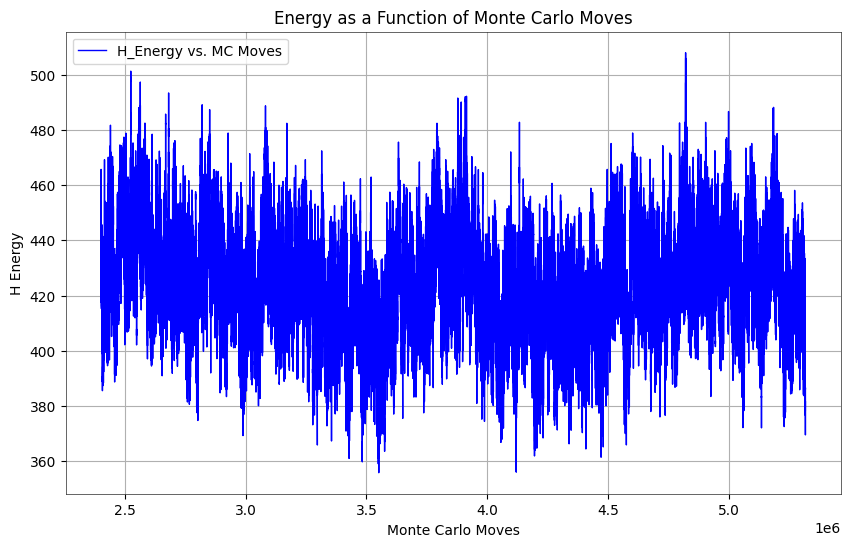

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(moves[first::every], H_energies[first::every], label="H_Energy vs. MC Moves", color='b', linewidth=1)
plt.xlabel("Monte Carlo Moves")
plt.ylabel("H Energy")
plt.title("Energy as a Function of Monte Carlo Moves")
plt.legend()
plt.grid()
plt.show()


In [ ]:


# # 3) Plot H vs. MC moves
# plt.figure(figsize=(6, 4), dpi=100)
# plt.plot(mc_moves, H, marker='o', linestyle='-', color='blue', label='H')

# # 4) Optional: Plot Ea and Eb if you like
# #    (You can comment these lines out if only H is needed)
# # plt.plot(mc_moves, E_a, marker='s', linestyle='-', color='red',  label='E_a')
# # plt.plot(mc_moves, E_b, marker='^', linestyle='-', color='green',label='E_b')

# plt.xlabel('MC Moves')
# plt.ylabel('Energy')
# plt.title('Energy vs. MC Moves')
# plt.legend()
# plt.grid(True)

## Demo: Calculate Free energy

In [5]:
nuc_breath = NucleosomeBreath(nuc_method='hybrid')

In [6]:
seq_601 = 'CTGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGACAGCTCTAGCACCGCTTAAACGCACGTACGCGCTGTCCCCCGCGTTTTAACCGCCAAGGGGATTACTCCCTAGTCTCCAGGCACGTGTCAGATATATACATCCTGT'

In [ ]:
F, F_entropy, E, F_free = nuc_breath.calculate_free_energy(seq601=seq_601, site_loc= nuc_breath.select_phosphate_bind_sites(left=0, right=13))

In [8]:
F

1546.6919309429359

In [9]:
E

63.65899348462699

In [5]:


# F_values_df = pd.DataFrame(index=range(0,13), columns=range(1,14))
# print(F_values_df)
F_state = dict()

for left in range(0,13):
    for right in range(0,14):

        if left <= right:
            
            state = nuc_breath.select_phosphate_bind_sites(left=left, right=right)
            if len(state) == 0:
                continue

            F, F_entropy, E, F_free = nuc_breath.calculate_free_energy(seq601=seq_601, site_loc=state)
            
            # F_values_df.at[left, right] = E
            F_state[(left, right)] = E

print(F_state)

{(0, 0): 0.9040446210300459, (0, 1): 4.796106878251692, (0, 2): 10.515035604635159, (0, 3): 16.965757287000997, (0, 4): 21.08071869894775, (0, 5): 26.181187843232692, (0, 6): 29.82821608690574, (0, 7): 35.25359355220644, (0, 8): 39.209789183289104, (0, 9): 48.30864410243521, (0, 10): 56.38261461790535, (0, 11): 62.975638992429595, (0, 12): 68.9388486797252, (0, 13): 72.36123880634113, (1, 1): 2.2364315251453135, (1, 2): 7.933311545568927, (1, 3): 14.384073886044916, (1, 4): 18.499035302997072, (1, 5): 23.599504491697644, (1, 6): 27.246532713511442, (1, 7): 32.671910244571336, (1, 8): 36.62810582316524, (1, 9): 45.7269604964913, (1, 10): 53.80093133826085, (1, 11): 60.39395557971875, (1, 12): 66.35716525432872, (1, 13): 69.77955546243902, (2, 2): 2.835375326044584, (2, 3): 9.285565885053643, (2, 4): 13.400525446754727, (2, 5): 18.500994638855445, (2, 6): 22.148022865514577, (2, 7): 27.573400388067967, (2, 8): 31.529595948781207, (2, 9): 40.6284507261953, (2, 10): 48.70242140561459, (2, 

In [5]:
# Convert the F_state dictionary to a DataFrame
F_state_df = pd.DataFrame(list(F_state.items()), columns=['State', 'Energy'])

# Split the 'State' column into 'Left' and 'Right' columns
F_state_df[['Left', 'Right']] = pd.DataFrame(F_state_df['State'].tolist(), index=F_state_df.index)

# Drop the 'State' column as it's no longer needed
F_state_df.drop(columns=['State'], inplace=True)

# Display the resulting DataFrame
print(F_state_df)

        Energy  Left  Right
0     0.904045     0      0
1     4.796107     0      1
2    10.515036     0      2
3    16.965757     0      3
4    21.080719     0      4
..         ...   ...    ...
99    5.410315    11     11
100  11.372433    11     12
101  14.794841    11     13
102   2.260839    12     12
103   5.666246    12     13

[104 rows x 3 columns]


In [6]:
F_state_df['unwrapped'] = 14 - (F_state_df['Right']-F_state_df['Left'] + 1)

In [7]:
print(F_state_df)

        Energy  Left  Right  unwrapped
0     0.838485     0      0         13
1     4.649070     0      1         12
2    10.320880     0      2         11
3    16.638184     0      3         10
4    21.131665     0      4          9
..         ...   ...    ...        ...
99    5.060750    11     11         13
100  11.504327    11     12         12
101  15.392514    11     13         11
102   2.453938    12     12         13
103   6.326057    12     13         12

[104 rows x 4 columns]


        Energy  Left  Right  unwrapped
0     0.838485     0      0         13
1     4.649070     0      1         12
2    10.320880     0      2         11
3    16.638184     0      3         10
4    21.131665     0      4          9
..         ...   ...    ...        ...
99    5.060750    11     11         13
100  11.504327    11     12         12
101  15.392514    11     13         11
102   2.453938    12     12         13
103   6.326057    12     13         12

[104 rows x 4 columns]


AttributeError: 'list' object has no attribute 'unique'

In [7]:
F_state_df.to_csv('F_state_df_hy.csv', index=False)    

In [30]:
###get first unwrapped sites from left
first_state = nuc_breath.select_phosphate_bind_sites(left=0, right=12)
second_state = nuc_breath.select_phosphate_bind_sites(right=11)
third_state = nuc_breath.select_phosphate_bind_sites(right=10)

In [31]:
## first_state free energy

one_F, one_F_entropy, one_E, one_F_free = nuc_breath.calculate_free_energy(seq601=seq_601, site_loc=first_state)
two_F, two_F_entropy, two_E, two_F_free = nuc_breath.calculate_free_energy(seq601=seq_601, site_loc=second_state)
three_F, three_F_entropy, three_E, three_F_free = nuc_breath.calculate_free_energy(seq601=seq_601, site_loc=third_state)

In [32]:
two_F-one_F

5.037951265207084

In [33]:
three_F-two_F

4.097220923453278

In [3]:
import numpy as np
from scipy.optimize import brentq

# Parameters
k_r = 1.0  # example rewrapping rate
k_u = 0.5  # example unwrapping rate
N = 10     # number of states (0 to N)

alpha = k_r / k_u

def r_roots(lambda_val, alpha, k_u):
    # gamma = lambda/(2*k_u)
    gamma = lambda_val / (2*k_u)
    # Coefficients for the quadratic in r: r^2 - (alpha+1+gamma)*r + alpha = 0
    A = 1.0
    B = -(alpha + 1 + gamma)
    C = alpha
    # Discriminant
    D = B*B - 4*A*C
    r_plus = (-(B) + np.sqrt(D)) / 2
    r_minus = (-(B) - np.sqrt(D)) / 2
    return r_plus, r_minus

def f(lambda_val):
    # Compute r+, r-
    r_plus, r_minus = r_roots(lambda_val, alpha, k_u)
    
    # Compute the transcendental equation:
    # (lambda + 2 k_u)*((r_+^N - r_-^N)/(r_+^{N-1}-r_-^{N-1})) - 2 k_r = 0
    numerator = (r_plus**N - r_minus**N)
    denominator = (r_plus**(N-1) - r_minus**(N-1))
    
    # Avoid division by zero if needed
    if denominator == 0:
        return 1e9  # large number to indicate not a valid root near this guess
    
    lhs = (lambda_val + 2*k_u)*(numerator/denominator)
    return lhs - 2*k_r

# To find a root, we need a bracket where f changes sign.
# Eigenvalues are typically negative, so we might start searching in a negative range.

lambda_low = -100.0
lambda_high = 0.0

# Use brentq to find one root (one eigenvalue)
lambda_root = brentq(f, lambda_low, lambda_high)
print("Found eigenvalue lambda =", lambda_root)


ValueError: f(a) and f(b) must have different signs

In [12]:
# Set the seed for reproducibility
random.seed(42)

# Define the possible nucleotides
nucleotides = ['A', 'C', 'G', 'T']

# Generate the random DNA sequences
sequences = [''.join(random.choices(nucleotides, k=147)) for _ in range(100000)]

# Organize sequences into a list of lists, each containing 100 sequences
sequences_ordered = [sequences[i:i + 100] for i in range(0, len(sequences), 100)]

# Print the first 10 sequences from the first sublist
print(sequences_ordered[0][:10])
# Define the file path
# file_path = "random_sequences.txt"

# Write the data
for i, sublist in enumerate(sequences_ordered):
    # Define the directory path
    directory_path = "./random_sequences"

    # Ensure the directory exists
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)

    # Define the file path with the current index
    file_path = os.path.join(directory_path, f"random_sequences_{i+1}.txt")

    # Open the file in write mode
    with open(file_path, "w") as file:
        # Write the sequences to the file
        for seq in sublist:
            file.write(f"{seq}\n")

# Print the file path
print(f"File created: {file_path}")

['GACAGGTACAAGAAGGAGTATGCATCAATGTGGTCGTGTGGAACAAACGCCACTGGAGACTGGGTTAACCATTCGCTCCAGCGTCATGAAAGTCACTGTTAGGGCGACCTTCGATTCGGATGTGACATTTCATTACATTACGCTCAG', 'GACTGCGAACGAAAGATTAAGAATGCTTAACCCGGTACCTAACCCATCTGATTTTTACACACTCTCCTTGGACTGGGAGGTATAAGGAATAGGCGGTAGACGCCTACTTAACTTTCATGGTGATCGTAAAGCGGAGCCTTACCATGC', 'GGCAATTGTGAACTTTTAAATTCGATTTTTAGCTTTTCTATTATCCTAAACTTCGCTGTATATCACGCGGCGCGATGGGGCAGCCTGCCCCCACTGTGCGACCGGCCACTTAAGGCTTGAAAACTACGAGCAGATTACATGAATCTG', 'TGTTGGGTGTGCCAGTGGCACCCGAAGGACGCACTGGTTCACTTTCGGGAACACGCACAGACGAGACACACTCTTCAAGTCGTGTTAAAAGGAGTAGGATTAACGTCGAGGATTGATTCCCGCTTATGTGCGTCTGCCGCTTATACG', 'CATAATCTGCATAGCTGGCTAAGCGCGCGCGCCAAAGTAACGTGCAAAAAGCTGGATCTGCCAATCTCAGAAGCTATGTAGCCTTCGGGTAAGAAAACGCAGGCGTTGGTCGGTTAACGGCAGGTGCAACCCATTGTTGCATCGTAG', 'GCACCGTCGCTTGCCCTCGTGGCACTGTAGTCGATGAAGGATTCATCGGCTTAGCTGTTCTCTGTCCGTCAGCGGCCAGGATAGGTCGTTCAGGTTCGCGCGACTCGGTTTCCGTTAAGTTGCAGTCGTATCCAGGTAATGATACCC', 'ATTGACCGGCCTACCAGGTCTGCGGGAGCTCTGCGGGGGTGTGCCGGACGAAGTGTTCTCTGCATATTGTTTCTAGCGGGTTAAATGTAATT

In [4]:
# # Define the possible nucleotides
# nucleotides = ['A', 'C', 'G', 'T']

# # Define the GC content
# gc_content = np.linspace(2/147, 145/147, 144)

# # Generate the random DNA sequences
# sequences = []
# for gc in gc_content:
#     for _ in range(10):
#         GC_list = random.choices(['G', 'C'], k=int(147*gc))
#         AT_list = random.choices(['A', 'T'], k=147-int(147*gc))
#         seq_list = GC_list + AT_list
#         random.shuffle(seq_list)
#         seq = ''.join(seq_list)
        

#         # seq = ''.join( + random.choices(['A', 'T'], k=147-int(147*gc)))
#         # random.shuffle(seq)
#         sequences.append(seq)

# # Print the first 10 sequences
# print(sequences[:10])

['TTTTATTAAATATTTATAATAATTAAATAATATTATATATATTAATATAAAAAAAATTATAAATATTATTATAGATTTAAATTATTTATTTTAATATAATAATTTCAAATATTTTTATAAATTTAAAATTATTATTTTTAATTTAAT', 'AATATTTAATTAATTTTATTAAAAAAATTTAATAAAAAAATATATTAAATATTTTTAGTTTATTAAAATATTAATTTATTAATAAAATTAATTATAAATTAATAAATTATTTATTTTTAAAATAATAAAATAAAATAATATCTAATA', 'TAGTTATTTTTTTATAAAAGAATATAAATAATTAAAATTAAAATATTATAAAATAATATTAAAATAAAATAATTAATTTAATATTAATTTATAATATAAATATATTTATATAATAAATAAAATATTTAATTATTATTTATATAAATT', 'CTAATTTTTAATTATAATATTAATTTAAAATTAATTAAATTATTTATTTATTCAATATATTTAATAAATTATTTTATAAAAAAATAAAATTTATATTTAATTAAATTTAATTTTTTTTAATATAAAATTTATTAAATATAATTATTA', 'AAAATTTTTATATATATATAATAAATTAAATAAAATAAATAATATTAATTTGATTATTAATAAATAAAAAAATTTTTAATTAATTAATTAAATTTATGTTAAATTTAAAATTAATTAAATTAAATTTTATTTAATTTAATTAAAATT', 'AAAATTTTTTATTTAAATTATATATTTTTTTATATTAAATATATTTTTATTAAATCTTATTGTAATAATTAAATATAATTATAATAAAATTATTTAATTTAAATATAAAATTAATTATAATTTTTTTTTAAATTTTTTAATTTATAT', 'AAATTAATAATAAATTTTTATAATATTTTTTATTATTAAATTATTTTTTTTATAATATAATAATCTACAATAATTAAAATAAAAAATTAATT

In [5]:
# def calculate_gc_content(sequence):
#     total_bases = len(sequence)
#     gc_bases = sequence.count('G') + sequence.count('C')
#     gc_content = (gc_bases / total_bases) * 100
#     return gc_content


In [ ]:
# nucleosomebreath  = NucleosomeBreath()
# nuc_df = pd.DataFrame()
# GC_list = []
# Free_energy_list = []
# Entropy_list = []
# Enthalpy_list = []

# for s in sequences:
#     gc_content = calculate_gc_content(s)
#     print(f"GC content: {gc_content}%")
#     Free_energy, entropy, enthalpy = nucleosomebreath.calculate_free_energy(seq601=s,
#                                                                             site_loc=nucleosomebreath.select_phosphate_bind_sites(left=0, right=13))
    
#     GC_list.append(gc_content)
#     Free_energy_list.append(Free_energy)
#     Entropy_list.append(entropy)
#     Enthalpy_list.append(enthalpy)

# nuc_df['GC_content'] = GC_list
# nuc_df['Free_energy'] = Free_energy_list
# nuc_df['Entropy'] = Entropy_list
# nuc_df['Enthalpy'] = Enthalpy_list



In [16]:
# import logging

# logging.basicConfig(level=logging.INFO)

In [17]:

# def calculate_energy_gc(seq):
#     logging.info('Starting calculation for sequence: %s', seq)
#     nucleosomebreath  = NucleosomeBreath(index=1)
#     gc_content = calculate_gc_content(seq)
#     logging.info('GC content for sequence: %s is %s', seq, gc_content)
#     Free_energy, entropy, enthalpy = nucleosomebreath.calculate_free_energy(seq601=seq,
#                                                                         site_loc=nucleosomebreath.select_phosphate_bind_sites(left=0, right=13))
#     logging.info('Free energy: %s, entropy: %s, enthalpy: %s', Free_energy, entropy, enthalpy)
#     return gc_content, Free_energy, entropy, enthalpy

    

In [18]:
# calculate_energy_gc( sequences[i])

INFO:root:Starting calculation for sequence: CGGGGGGCCGCCGGGGGCGGGCCCCCGGGCGCGCCGGCGCGCGGCGCGGGCGGGGGGCGCGCGCCGCGCCGCGGGGGCGGGCGGGGCCGCGGCCGGCGCCGCGCGCCGGACGCCGCCGCTGGGCCGGCCGGGCCCGGCCGGGCCCCG
INFO:root:GC content for sequence: CGGGGGGCCGCCGGGGGCGGGCCCCCGGGCGCGCCGGCGCGCGGCGCGGGCGGGGGGCGCGCGCCGCGCCGCGGGGGCGGGCGGGGCCGCGGCCGGCGCCGCGCGCCGGACGCCGCCGCTGGGCCGGCCGGGCCCGGCCGGGCCCCG is 98.63945578231292
INFO:root:Free energy: 1567.4076754858652, entropy: 1594.751297472374, enthalpy: 84.36229882761836


119.0


(98.63945578231292, 1567.4076754858652, 1594.751297472374, 84.36229882761836)

In [11]:

# directory = r'C:\Users\maya620d\PycharmProjects\Spermatogensis\Cluster_Results\Nucleosome_Free_Energy'
directory = r'C:\Users\maya620d\PycharmProjects\MarkovModel\Cluster_results\Nucleosome_Free_Energy_Hybrid_TH_MMC'
# Get all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Create an empty DataFrame to store the data
df = pd.DataFrame()

# Iterate over each CSV file
for file in csv_files:
    # Extract the file number from the file name
    file_number = int(file.split('_')[0])
    
    # Read the CSV file into a DataFrame
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)
    
    # Add the file number as a new column
    data['File Number'] = file_number
    
    # Append the data to the main DataFrame
    df = pd.concat([df, data], ignore_index=True)

# Print the resulting DataFrame
df['GC_content'] = df['GC_content'].round(2)
print(df)


       Unnamed: 0  GC_content  Free_energy      Entropy   Enthalpy  \
0               0       68.71  1554.393692  1481.882938  72.510755   
1               1       68.71  1549.555446  1481.131486  68.423960   
2               2       68.71  1551.414645  1481.574140  69.840505   
3               3       68.71  1548.925426  1478.608094  70.317333   
4               4       68.71  1549.671779  1481.527306  68.144473   
...           ...         ...          ...          ...        ...   
14395          95        6.12  1547.748980  1485.402022  62.346958   
14396          96        6.12  1551.816247  1486.727081  65.089166   
14397          97        6.12  1548.167655  1485.741375  62.426280   
14398          98        6.12  1550.110938  1487.165792  62.945146   
14399          99        6.12  1550.828871  1484.945358  65.883513   

       Free_DNA_energy                                          Sequences  \
0          1646.942424  GGGGGCGGGGCAAAGGTGGGATCAGCCCTCCTCCAGATTGTGGTGT...   
1    

In [7]:
# Read the file 'gc_content.txt'
# gc_content_file = r'C:\Users\maya620d\PycharmProjects\Spermatogensis\Parameters\gc_content.txt'
# gc_content_df = pd.read_csv(gc_content_file, sep=' ', header=None, names=['File Number', 'GC Content'])

# # gc_content_df
# # Merge the gc_content_df with the df DataFrame
# df = pd.merge(df, gc_content_df, on='File Number', how='left')

In [12]:
df_grouped = df.groupby(['GC_content', 'File Number']).agg({'Free_energy': 'mean',
                                                'Enthalpy':'mean', 
                                                'Entropy':'mean'}).reset_index()
df_filtered = df_grouped[df_grouped['File Number'] == 74]
df_filtered.rename(columns={'Free_energy': 'Free_energy_', 
                            'Enthalpy': 'Enthalpy_', 
                            'Entropy': 'Entropy_'}, 
                            inplace=True)

# Append columns from df_filtered to df_grouped
df.loc[:, ['Free_energy_', 'Enthalpy_', 'Entropy_']] = df_filtered[['Free_energy_', 'Enthalpy_', 'Entropy_']].values[0]

# Calculate the differences
df['Free_energy_diff'] = df['Free_energy'] - df['Free_energy_']
df['Enthalpy_diff'] = df['Enthalpy'] - df['Enthalpy_']
df['Entropy_diff'] = df['Entropy'] - df['Entropy_']

C:\Users\maya620d\AppData\Local\Temp\ipykernel_11804\1837445595.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns={'Free_energy': 'Free_energy_',


In [13]:
df_grouped[df_grouped['GC_content'] == 50.34]


,GC_content,File Number,Free_energy,Enthalpy,Entropy
73,50.34,74,1549.420341,68.080748,1481.339594


c:\Users\maya620d\AppData\Local\anaconda3\envs\un_dna\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\maya620d\AppData\Local\anaconda3\envs\un_dna\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\maya620d\AppData\Local\anaconda3\envs\un_dna\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\maya620d\AppData\Local\anaconda3\envs\un_dna\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

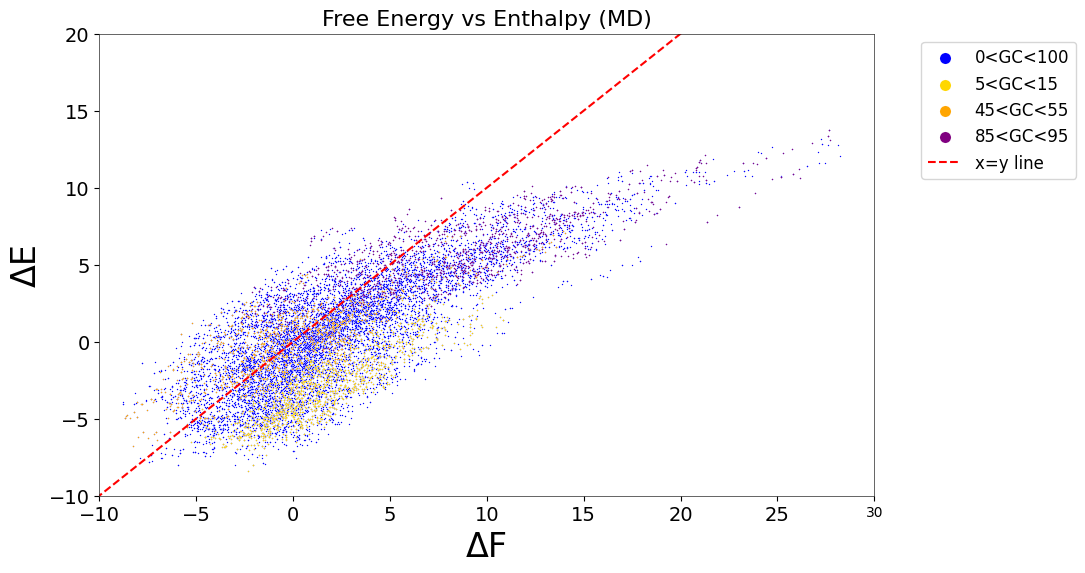

In [15]:
highlight_ranges = [(5,15), (45, 55), (85, 95)]
colors = ['gold', 'orange', 'purple']   

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Free_energy_diff', y='Enthalpy_diff', color='blue', label=f'0<GC<100', s=1)

# Highlight the points that fall under the specified GC content ranges
for i, (highlight_min, highlight_max) in enumerate(highlight_ranges):
    highlighted = df[(df['GC_content'] >= highlight_min) & (df['GC_content'] <= highlight_max)]
    sns.scatterplot(data=highlighted,  x='Free_energy_diff', y='Enthalpy_diff', color = colors[i], s=1, label=f'{highlight_ranges[i][0]}<GC<{highlight_ranges[i][1]}', )

# # Draw a mean line
# mean_value = df['Free_energy'].mean()
# plt.axhline(mean_value, color='green', linestyle='--', label=f'Mean Free Energy: {mean_value:.2f}')
# Draw a line where x is equal to y
plt.plot([-60, 40], [-60, 40], color='red', linestyle='--', label='x=y line')


# Add labels and title
plt.xlabel('ΔF', fontsize=24)
plt.ylabel('ΔE', fontsize=24)
plt.title('Free Energy vs Enthalpy (MD)', fontsize=16)
# plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set the x and y axis limits
plt.xlim(-10, 30)
plt.ylim(-10, 20)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 12}, markerscale=8)

# Show the plot
plt.show()

c:\Users\maya620d\AppData\Local\anaconda3\envs\un_dna\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\maya620d\AppData\Local\anaconda3\envs\un_dna\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\maya620d\AppData\Local\anaconda3\envs\un_dna\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\maya620d\AppData\Local\anaconda3\envs\un_dna\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

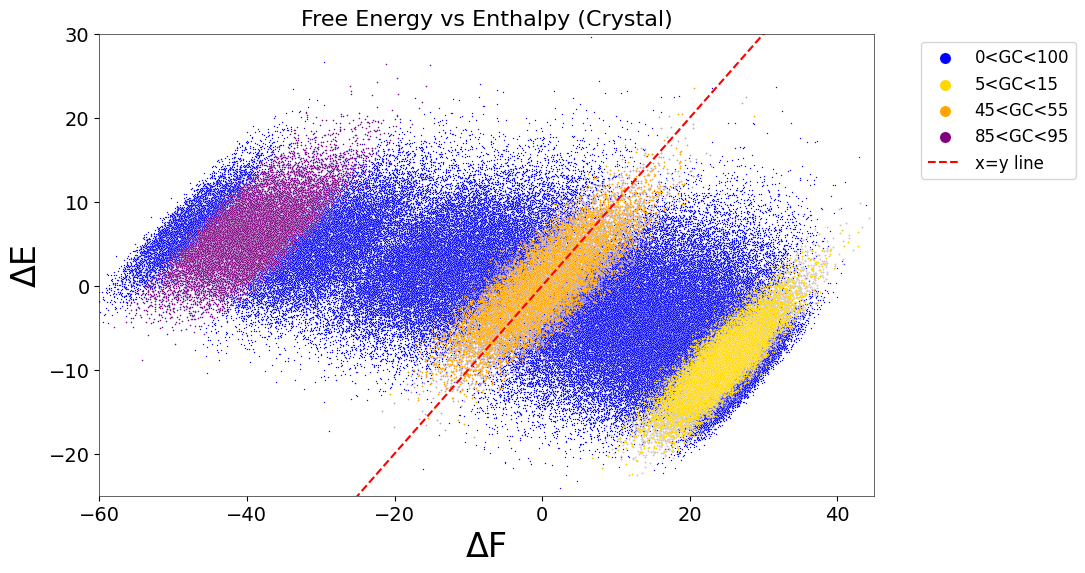

In [56]:
# Define the ranges of GC content to highlight
highlight_ranges = [(5,15), (45, 55), (85, 95)]
colors = ['gold', 'orange', 'purple']   

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Free_energy_diff', y='Enthalpy_diff', color='blue', label=f'0<GC<100', s=1)

# Highlight the points that fall under the specified GC content ranges
for i, (highlight_min, highlight_max) in enumerate(highlight_ranges):
    highlighted = df[(df['GC_content'] >= highlight_min) & (df['GC_content'] <= highlight_max)]
    sns.scatterplot(data=highlighted,  x='Free_energy_diff', y='Enthalpy_diff', color = colors[i], s=1, label=f'{highlight_ranges[i][0]}<GC<{highlight_ranges[i][1]}', )

# # Draw a mean line
# mean_value = df['Free_energy'].mean()
# plt.axhline(mean_value, color='green', linestyle='--', label=f'Mean Free Energy: {mean_value:.2f}')
# Draw a line where x is equal to y
plt.plot([-60, 40], [-60, 40], color='red', linestyle='--', label='x=y line')


# Add labels and title
plt.xlabel('ΔF', fontsize=24)
plt.ylabel('ΔE', fontsize=24)
plt.title('Free Energy vs Enthalpy (Crystal)', fontsize=16)
# plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set the x and y axis limits
plt.xlim(-60, 45)
plt.ylim(-25, 30)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 12}, markerscale=8)

# Show the plot
plt.show()

# Experimental Validation for Nucleosome Free Energy Calculation

## Tetra-Histones are bound on DNA

In [3]:
####sequences from the segal paper 2006


c1 = 'CTGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGCAAGCTCTAGCACCGCTTAAACGCACGTACGCGCTGTCCCCCGCGTTTTAACCGCCAAGGGGATTACTCCCTAGTCTCCAGGCACGTGTCAGATATATACATCCTGT'
c2 = 'CTGGAGATACCCGGTGCTAAGGCCGCTTAATTGGTCGTAGCAAGCTCTAGCACCGCTTAAACGCACGTACGCGCTGTCTACCGCGTTTTAACCGCCAATAGGATTACTTACTAGTCTCTAGGCACGTGTAAGATATATACATCCTGT'
c3 = 'GTCGTAGCAAGCTCTAGCACCGCTTAAACGCACGTACGCGCTGTCTACCGCGTTTTAACCGCCAATAGGATTACTTACTAG'

d1 = 'ATGGATCCTTGCAAGCTCTTGGTGCGCTTTTTCGGCTGTTGACGCCCTGTTCGGCAGTTTTTGCGCACCTTGAGCCCCCTCTCCGGAATTCAC'
d2 = 'ATGGATCCGCGCAAGCTCGCGGTGCGCTTAAACGGCTGGCGACGCCCTGGCCGGCAGTTTAAGCGCACCGCGAGCCCCCTCTCCGGAATTCAC'
d3 = 'ATGGATCCTCGCAAGCGAGCTTTGCTAGGCCCCGTCTGTCGCCTCACGGGACGGAAGGGGCCTAGCACAGCTCGCCCCCGCTCCGGAATTCAC'
d4 = 'ATGGATCCATGCAAGCTCATGGTGCGCAATTTCGGCTGATGACGCCCTGATCGGCAGAAATTGCGCACCATGAGCCCCCTCTCCGGAATTCAC'
d5 = 'ATGGATCCATGCAAGCTCATGGTGCGCCCGGGCGGCTGATGACGCCCTGATCGGCAGCCCGGGCGCACCATGAGCCCCCTCTCCGGAATTCAC'

e1 = 'CTGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGCAAGCTCTAGCACCGCTTAAACGCACGTACGCGCTGTCCCCCGCGTTTTAACCGCCAAGGGGATTACTCCCTAGTCTCCAGGCACGTGTCAGATATATACATCCTGT'
e2 = 'ATGGATCCTAGCAAGCTCTAGGTGCGCTTAAACGGCTGTAGACGCCCTATCCTGTACGGCAGTTTAAGCGCACCTAGAGCCTCCGGAATTCAC'
e3 = 'ATGGATCCTAGCATACTCTAGGTTAGCTTAAACTACTGTAGACTTACTGTACGGCAGTTTAAGCTAACCTAGAGTACCCTCTCCGGAATTCAC'

rba = dict({
'c1': 1, 
'c2': 2.5,
'c3': 1.5,

'd1': 1,
'd2': .16,
'd3': .14,
'd4': .12,
'd5': .1,

'e1': 1, 
'e2': .15,
'e3': .1
})

pref = 'GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGG' 
endf = 'TGGATCTCTAGAGTCGACCTGCAGCCCAAGCTT'

### Sequences from the Shrader TE, Gothers paper 1989 

TG = pref+'TCGGTGTTAGAGCCTGTAACTCGGTGTTAGAGCCTGTAACTCGGTGTTAGAGCCTGTAACTCGGTGTTAGAGCCTGTAACTCGGTGTTAGAGCCTGTAAC'+endf
GT = pref+'TCGGGTTTAGACCTTGTAACTCGGGTTTAGACCTTGTAACTCGGGTTTAGACCTTGTAACTCGGGTTTAGACCTTGTAACTCGGGTTTAGACCTTGTAAC' + endf
TG_T = pref+'TCGGTGTCAGAGCCTGTGACTCGGTGTCAGAGCCTGTGACTCGGTGTCAGAGCCTGTGACTCGGTGTCAGAGCCTGTGACTCGGTGTCAGAGCCTGTGAC'+endf
TR_5 = pref+'TCGGAAGACTTGTCAACTGTTCGGAAGACTTGTCAACTGTTCGGAAGACTTGTCAACTGTTCGGAAGACTTGTCAACTGTTCGGAAGACTTGTCAACTGT'+endf
TRGC = pref+'TCGGACTCCAGAGGTCACCATCGGACTCCAGAGGTCACCATCGGACTCCAGAGGTCACCATCGGACTCCAGAGGTCACCATCGGACTCCAGAGGTCACCA'+endf

energy_sh_tr = dict({ 'TG':0, 'GT':0, 'TG_T':1950, 'TR_5':1900, 'TRGC':1300})  ## the energies are in cal/mol  to convert in KT multiply by 1.689 * 10^-3


### Sequences from the Shrader TE, Gothers paper 1990


TG = pref+'TCGGTGTTAGAGCCTGTAAC'*5 + endf
ANISO = pref+'TCGGTGTTAGCTTACGTAAC'*5 + endf
TTT = pref+'TCGGTGTTTGTGCCTGTTTC'*5 + endf
NOTA = pref+'TCGGTGAATGAGCCTGATTC'*5 + endf
EXAT = pref+'TCGGTGTTAGCAATCGTAAC'*5 + endf
EXGC = pref+'TCGGTACCGTAGCCTGTAAC'*5 + endf
IAT = pref+'TCGGTGTTAGCAGTCGTAAC'*5 + endf
IGC = pref+'TCGGTACTGTAGCCTGTAAC'*5 + endf
END  = pref+'TCGGTCTTTGTCGGTGTTTC'*5 + endf
ANNA = pref+'TCGGTGTTAGAGCATGTAAC'*5 + endf
three_four = pref+'TCGGTCTAGACCAAGGAGTC'*5 + endf
two_zero = pref+'TCGGCACGTCGAGCTACTCC'*5 + endf


energy_sh_tr_1 = dict({ 'TG':0, 'ANISO':750, 'TTT':900, 
                       'NOTA':1600, 'EXAT':700, 'EXGC':1550, 
                       'IAT':500, 'IGC':1300, 'END':1600, 'ANNA':150, 
                       'three_four':2000, 'two_zero':1550})  ## the energies are in cal/mol  to convert in KT multiply by 1.689 * 10^-3

In [ ]:
def calculate_free_dna_energy(h_seq:str, dimers:dict):

    kBT = 1
    sum_log_det_l = 0
    N = len(h_seq)-1
    for i in range(N):
        bp = h_seq[i:i+2].upper()
        pstiff = dimers[bp]['stiff']
        det_value = np.linalg.det(pstiff)

        sum_log_det_l = sum_log_det_l + np.log(det_value)


    F_free_DNA_h = kBT * sum_log_det_l / 2

    return F_free_DNA_h


In [5]:
sequence_dict = {
    'IAT': IAT,
    'IGC': IGC,
    'NOTA': NOTA,
    'TG': TG,
    'TG_T': TG_T,
    'TRGC': TRGC,
    'TR_5': TR_5,
    'TTT': TTT,
    'd1': d1,
    'd2': d2,
    'c1': c1,
    'd3': d3,
    'd4': d4,
    'd5': d5,
    'e1': e1,
    'e2': e2,
    'e3': e3,
    'three_four': three_four,
    'two_zero': two_zero,
    'c2': c2,
    'c3': c3,
    'ANISO': ANISO,
    'ANNA': ANNA,
    'END': END,
    'EXAT': EXAT,
    'EXGC': EXGC,
    'GT': GT
}

In [18]:
nucleosomebreath  = NucleosomeBreath(nuc_method='md', hang_dna_method='md')

dimers_dict = nucleosomebreath.genstiff_hang.dimers

hang_dna_energy = dict()

for key, value in sequence_dict.items():
      
    hang_dna_en = calculate_free_dna_energy(h_seq=value, 
                                            dimers=dimers_dict)
    stiff, gs = nucleosomebreath.genstiff_nuc.gen_params(value)
    print(stiff)
    logdet_sign, logdet = np.linalg.slogdet(stiff)
    print(key, stiff.shape, 0.5*logdet, logdet_sign)
    print(hang_dna_en)
    # log_det_stiff = 0.5*np.log(det_stiff)
    # print(key, stiff.shape, log_det_stiff)
    # break
    hang_dna_energy[key] = 0.5*logdet


[[ 218.83073983  -29.77246379  -13.46182088 ...    0.
     0.            0.        ]
 [ -29.77246379  126.7891135    54.08086651 ...    0.
     0.            0.        ]
 [ -13.46182088   54.08086651  229.7047335  ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...  329.00130783
    21.63338067   36.58103415]
 [   0.            0.            0.         ...   21.63338067
   496.13433587  239.18556131]
 [   0.            0.            0.         ...   36.58103415
   239.18556131 1273.8913663 ]]
IAT (996, 996) 2786.9997792268305 1.0
2782.115734626636
[[ 218.83073983  -29.77246379  -13.46182088 ...    0.
     0.            0.        ]
 [ -29.77246379  126.7891135    54.08086651 ...    0.
     0.            0.        ]
 [ -13.46182088   54.08086651  229.7047335  ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...  329.00130783
    21.63338067   36.58103415]
 [   0.            0.            0.         ...   2

In [ ]:

hang_dna_energy_df = pd.DataFrame(list(hang_dna_energy.items()), columns=['ID_split', 'F_C_free_dna'])
hang_dna_energy_df  

,ID_split,F_C_free_dna
0,IAT,2786.999779
1,IGC,2790.993668
2,NOTA,2796.028619
3,TG,2793.364749
4,TG_T,2792.348167
5,TRGC,2797.973899
6,TR_5,2794.453037
7,TTT,2795.372048
8,d1,1551.386405
9,d2,1546.472987


In [7]:
# Define the file path
file_path = "sequence_file.txt" ## Sequence file to run the calculation on the cluster

# Open the file in write mode
with open(file_path, "w") as file:
    # Write the header
    file.write("Index,Variable,Sequence\n")
    
    # Write the data
    file.write(f"1,c1,{c1}\n")
    file.write(f"2,c2,{c2}\n")
    file.write(f"3,c3,{c3}\n")
    
    
    file.write(f"4,ANISO,{ANISO}\n")
    file.write(f"5,ANNA,{ANNA}\n")
    file.write(f"6,END,{END}\n")
    file.write(f"7,EXAT,{EXAT}\n")
    file.write(f"8,EXGC,{EXGC}\n")
    file.write(f"9,GT,{GT}\n")
    file.write(f"10,IAT,{IAT}\n")
    file.write(f"11,IGC,{IGC}\n")
    file.write(f"12,NOTA,{NOTA}\n")
    file.write(f"13,TG,{TG}\n")
    file.write(f"14,TG_T,{TG_T}\n")
    file.write(f"15,TRGC,{TRGC}\n")
    file.write(f"16,TR_5,{TR_5}\n")
    file.write(f"17,TTT,{TTT}\n")
    
    file.write(f"18,d1,{d1}\n")
    file.write(f"19,d2,{d2}\n")
    file.write(f"20,d3,{d3}\n")
    file.write(f"21,d4,{d4}\n")
    file.write(f"22,d5,{d5}\n")
    file.write(f"23,e1,{e1}\n")
    file.write(f"24,e2,{e2}\n")
    file.write(f"25,e3,{e3}\n")

    file.write(f"26,three_four,{three_four}\n")
    file.write(f"27,two_zero,{two_zero}\n")
    
# Print the file path
print(f"File created: {file_path}")

File created: sequence_file.txt


In [15]:

def generate_sliding_sequence(sequence, seq_id):
    sliding_sequences = dict()
    window_size = 57
    final_length = 147
    padding = 'A'

    for i in range(len(sequence) - window_size + 1):
        sliding_seq = sequence[i:i+window_size]
        prefix = sequence[:i]
        suffix = sequence[i+window_size:]

        # Calculate the number of 'AT' sequences needed on each side
        total_padding_needed = final_length - len(sliding_seq)
        padding_needed_each_side = total_padding_needed // 2
        remainder_padding = total_padding_needed % 2

        # Create the padded sequence
        padded_sequence = (padding * (padding_needed_each_side // len(padding))) + sliding_seq + (padding * (padding_needed_each_side // len(padding)))
        left_padding = True
        for k in range(remainder_padding):
            if left_padding:
                padded_sequence = padding + padded_sequence
                left_padding=False
            else:
                padded_sequence = padded_sequence + padding
                left_padding=True
        # if len(padded_sequence) != final_length:
        #     padded_sequence = 'A'+ padded_sequence
        

        sequence_temp_array = [prefix, padded_sequence, suffix]

        sliding_sequences[seq_id+'_'+str(i)] = sequence_temp_array
    return sliding_sequences


# sequence = "ATCGATCGATCGATCGATCGATCGATCG"
sliding_sequences = generate_sliding_sequence(c1, 'c1')
print(sliding_sequences)

{'c1_0': ['', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACTGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGCAAGCTCTAGCACCGCTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA', 'TAAACGCACGTACGCGCTGTCCCCCGCGTTTTAACCGCCAAGGGGATTACTCCCTAGTCTCCAGGCACGTGTCAGATATATACATCCTGT'], 'c1_1': ['C', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGCAAGCTCTAGCACCGCTTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA', 'AAACGCACGTACGCGCTGTCCCCCGCGTTTTAACCGCCAAGGGGATTACTCCCTAGTCTCCAGGCACGTGTCAGATATATACATCCTGT'], 'c1_2': ['CT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGCAAGCTCTAGCACCGCTTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA', 'AACGCACGTACGCGCTGTCCCCCGCGTTTTAACCGCCAAGGGGATTACTCCCTAGTCTCCAGGCACGTGTCAGATATATACATCCTGT'], 'c1_3': ['CTG', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGCAAGCTCTAGCACCGCTTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA', 'ACGCACGTACGCGCTGTCCCCCGCGTTTTAACCGCCAAGGGGATTACTCCCTAG

In [97]:
len('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACTGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGCAAGCTCTAGCACCGCTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA')

147

In [10]:
len('CTGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGCAAGCTCTAGCACCG')

55

In [16]:
def generate_sliding_sequences_1(sequence, window_size):
    sliding_sequences = dict()
    sequence_length = len(sequence)
    
    for i in range(sequence_length - window_size + 1):
        prefix = sequence[:i]
        suffix = sequence[i+window_size:]
        sliding_seq = sequence[i:i+window_size]
        sequence_temp_array = [prefix, sliding_seq, suffix]

        sliding_sequences[i] = sequence_temp_array
    return sliding_sequences

### Read the cluster results

In [133]:
LEN_TETRAMER = 57

directory = r'C:\Users\maya620d\PycharmProjects\Spermatogensis\Cluster_Results\Tetramer_Nucleosome_Free_Energy_Hybrid_57_A_Hang_MD'

# Get all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Create an empty DataFrame to store the data
df = pd.DataFrame()

# Iterate over each CSV file
for file in csv_files:
    # Read the CSV file into a DataFrame
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)
    
    # Append the data to the main DataFrame
    df = pd.concat([df, data], ignore_index=True)

df.drop('Unnamed: 0', axis=1, inplace=True)

df[['ID_split', 'Index', 'None']] = df['ID'].str.split('_', expand=True)
# Print the resulting DataFrame
df.reset_index(inplace=True, drop=True)
print(df)

          ID                                           Sequence  Free_energy  \
0      IAT_5  ['GAATT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...  1631.899363   
1      IAT_3  ['GAA', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...  1631.546021   
2      IAT_2  ['GA', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...  1631.854845   
3      IAT_4  ['GAAT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...  1632.569733   
4      IAT_0  ['', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...  1630.681913   
...      ...                                                ...          ...   
2328  GT_104  ['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...  1637.695897   
2329  GT_107  ['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...  1629.463505   
2330  GT_109  ['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...  1628.939461   
2331  GT_108  ['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...  1627.629365   
2332  GT_110  ['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...  1632.893330   

          Entropy   Enthalpy  Free_DNA_

In [122]:
df_tr = df.loc[df['ID_split'].isin(['TG', 'TRGC']), ['ID','Free_energy', 'Index', 'ID_split']]
df_tr['Index']=df_tr['Index'].astype(int)
df_tr = df_tr.sort_values('Index')
df_tr.reset_index(inplace=True, drop=True)

df_tr

ValueError: invalid literal for int() with base 10: 'T'

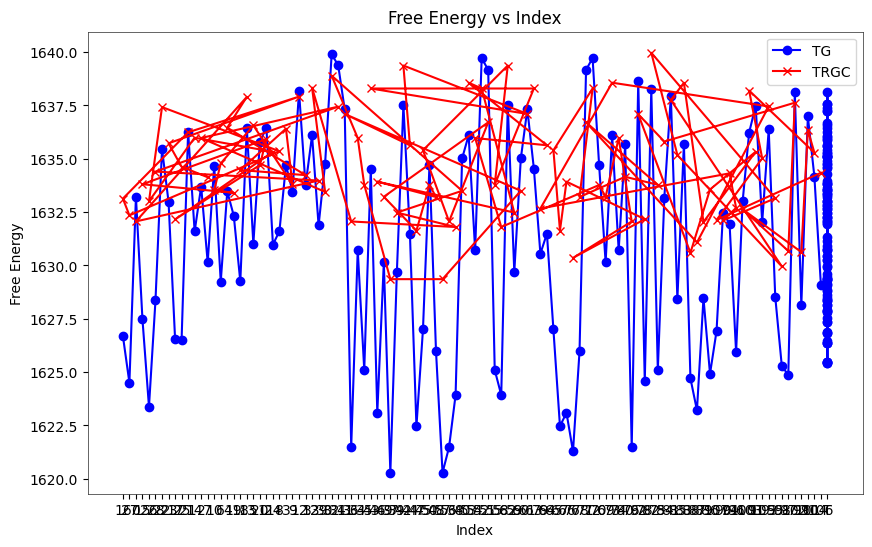

In [123]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_tr[df_tr['ID_split'] == 'TG']['Index'], df_tr[df_tr['ID_split'] == 'TG']['Free_energy'], color='blue', label='TG', marker='o')
plt.plot(df_tr[df_tr['ID_split'] == 'TRGC']['Index'], df_tr[df_tr['ID_split'] == 'TRGC']['Free_energy'], color='red', label='TRGC', marker='x')

plt.xlabel('Index')
plt.ylabel('Free Energy')
plt.title('Free Energy vs Index')
plt.legend()
plt.show()

In [39]:
lowest_grouped_df = df.groupby('ID_split').agg({'Free_energy': 'min', 'ID': 'first'}).reset_index()
lowest_grouped_df

,ID_split,Free_energy,ID
0,ANISO,1643.419629,ANISO_25
1,ANNA,1643.190283,ANNA_4
2,END,1647.097405,END_19
3,EXAT,1644.239934,EXAT_1
4,EXGC,1645.843698,EXGC_8
5,GT,1647.609972,GT_27
6,IAT,1641.719155,IAT_7
7,IGC,1646.077438,IGC_22
8,NOTA,1649.174770,NOTA_10
9,TG,1644.090216,TG_11


In [40]:
lowest_grouped_df['Adjusted_Free_energy'] = lowest_grouped_df['Free_energy'] - 1580
lowest_grouped_df['Boltzmann_weight'] = np.exp(-beta * lowest_grouped_df['Adjusted_Free_energy'])

In [42]:
_lowest_grouped_df = lowest_grouped_df[['ID_split', 'Boltzmann_weight']]

In [13]:
len('CTGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGCAAGCTCTAGCACCGCTTAA')

60

In [14]:
len('CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC')

45

In [15]:
len('CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC')

44

In [16]:
len('CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCTGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGCAAGCTCTAGCACCGCTTAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC')

149

In [134]:
rows_with_values = df[df['None'].notnull()]

# Combine 'ID_split' and 'Index' by '_' and assign to 'ID_split' column
df.loc[rows_with_values.index, 'ID_split'] = df.loc[rows_with_values.index, 'ID_split'] + '_' + df.loc[rows_with_values.index, 'Index']

# Assign 'None' column values to 'Index' column
df.loc[rows_with_values.index, 'Index'] = df.loc[rows_with_values.index, 'None']

# Set 'None' column values to None
df.loc[rows_with_values.index, 'None'] = None


In [22]:
hang_dna_energy_df

,ID_split,F_C_free_dna
0,IAT,2786.999779
1,IGC,2790.993668
2,NOTA,2796.028619
3,TG,2793.364749
4,TG_T,2792.348167
5,TRGC,2797.973899
6,TR_5,2794.453037
7,TTT,2795.372048
8,d1,1551.386405
9,d2,1546.472987


In [135]:
df['ID_group'] = df['ID_split'].apply(lambda x: x.split('_')[0] if x.startswith(('c', 'd', 'e')) else 'TG')
df['ID_group'] = df['ID_group'].replace({
    r'c\d+': 'c',
    r'd\d+': 'd',
    r'e\d+': 'e'
}, regex=True)

df

,ID,Sequence,Free_energy,Entropy,Enthalpy,Free_DNA_energy,Hang_DNA_energy,ID_split,Index,None,ID_group
0,IAT_5,"['GAATT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1631.899363,1596.076772,35.822591,1665.380355,1810.689976,IAT,5,None,TG
1,IAT_3,"['GAA', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1631.546021,1596.770973,34.775049,1665.785155,1809.542956,IAT,3,None,TG
2,IAT_2,"['GA', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1631.854845,1596.942769,34.912077,1665.883184,1809.695851,IAT,2,None,TG
3,IAT_4,"['GAAT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1632.569733,1596.630537,35.939196,1665.309955,1809.845828,IAT,4,None,TG
4,IAT_0,"['', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1630.681913,1596.312078,34.369834,1665.798378,1826.321452,IAT,0,None,TG
...,...,...,...,...,...,...,...,...,...,...,...
2328,GT_104,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1637.695897,1599.267722,38.428175,1669.492759,1817.468157,GT,104,None,TG
2329,GT_107,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1629.463505,1599.168917,30.294588,1669.163942,1817.613269,GT,107,None,TG
2330,GT_109,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1628.939461,1599.039760,29.899701,1668.926909,1817.613269,GT,109,None,TG
2331,GT_108,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1627.629365,1598.933917,28.695448,1668.788428,1817.613269,GT,108,None,TG


In [79]:
hang_dna_energy_df['ID_group'] = hang_dna_energy_df['ID_split'].apply(lambda x: x.split('_')[0] if x.startswith(('c', 'd', 'e')) else 'TG')
hang_dna_energy_df['ID_group'] = hang_dna_energy_df['ID_group'].replace({
    r'c\d+': 'c',
    r'd\d+': 'd',
    r'e\d+': 'e'
}, regex=True)


In [25]:
hang_dna_energy_df

,ID_split,F_C_free_dna,ID_group
0,IAT,2786.999779,TG
1,IGC,2790.993668,TG
2,NOTA,2796.028619,TG
3,TG,2793.364749,TG
4,TG_T,2792.348167,TG
5,TRGC,2797.973899,TG
6,TR_5,2794.453037,TG
7,TTT,2795.372048,TG
8,d1,1551.386405,d
9,d2,1546.472987,d


In [80]:
nucleosomebreath_1  = NucleosomeBreath(nuc_method='md', hang_dna_method='md')



In [81]:
LEN_TETRAMER = 57


In [130]:
nucleosomebreath_repeadted = NucleosomeBreath(nuc_method='hybrid', hang_dna_method='md')

In [ ]:
Unwrapped_DNA = dict()
Unwrapped_DNA_q = dict()

def ca_free_dna_energy(h_seq:str):

    stiff, gs = nucleosomebreath_1.genstiff_nuc.gen_params(h_seq)
    logdet_sign, logdet = np.linalg.slogdet(stiff)

    return 0.5*logdet

def ca_free_dna_energy_repeated(h_seq:str):

    stiff, gs = nucleosomebreath_repeadted.genstiff_nuc.gen_params(h_seq)
    logdet_sign, logdet = np.linalg.slogdet(stiff)

    return 0.5*logdet

for index, row in df.iterrows():
    sequence = eval(row['Sequence'])
    # print(sequence)
    first_element = sequence[0]
    second_element = sequence[1]
    third_element = sequence[2]
    # print(first_element)

    if len(first_element) != 0:
        first_energy = ca_free_dna_energy(first_element)
    else:
        first_energy = 0

    if len(third_element) != 0:
        third_energy = ca_free_dna_energy(third_element)
    else:
        third_energy = 0

    if (len(second_element)-LEN_TETRAMER)%2==0:
        f_index = (len(second_element)-LEN_TETRAMER)//2
        second_energy_1 = ca_free_dna_energy_repeated(second_element[:f_index])
    else:
        f_index = (len(second_element)-LEN_TETRAMER)//2+1
        second_energy_1 = ca_free_dna_energy_repeated(second_element[:f_index])

    second_energy_2 = ca_free_dna_energy_repeated(second_element[f_index+LEN_TETRAMER:])


    unwrapped_DNA_energy = second_energy_1 + second_energy_2
    # second_element
    Unwrapped_DNA[row['ID']] = unwrapped_DNA_energy
    Unwrapped_DNA_q[row['ID']] = first_energy + third_energy

    # combined_sequence = first_element + third_element
    
    

In [132]:
# Convert the Unwrapped_DNA dictionary to a DataFrame
unwrapped_dna_df = pd.DataFrame(list(Unwrapped_DNA.items()), columns=['ID', 'repeated_part_Energy'])
unwrapped_dna_df_q = pd.DataFrame(list(Unwrapped_DNA_q.items()), columns=['ID', 'Hang_DNA_Energy'])

# Display the DataFrame
unwrapped_dna_df

,ID,repeated_part_Energy
0,IAT_5,1496.827011
1,IAT_3,1496.827011
2,IAT_2,1496.827011
3,IAT_4,1496.827011
4,IAT_0,1496.827011
...,...,...
2328,GT_104,1496.827011
2329,GT_107,1496.827011
2330,GT_109,1496.827011
2331,GT_108,1496.827011


In [136]:
# Merge the unwrapped_dna_df with df on the 'ID' column
df = df.merge(unwrapped_dna_df, on='ID', how='left')

# Merge the unwrapped_dna_df_q with df on the 'ID' column
df = df.merge(unwrapped_dna_df_q, on='ID', how='left')

# Display the resulting DataFrame
df

,ID,Sequence,Free_energy,Entropy,Enthalpy,Free_DNA_energy,Hang_DNA_energy,ID_split,Index,None,ID_group,repeated_part_Energy,Hang_DNA_Energy
0,IAT_5,"['GAATT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1631.899363,1596.076772,35.822591,1665.380355,1810.689976,IAT,5,None,TG,1496.827011,1813.872198
1,IAT_3,"['GAA', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1631.546021,1596.770973,34.775049,1665.785155,1809.542956,IAT,3,None,TG,1496.827011,1812.738754
2,IAT_2,"['GA', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1631.854845,1596.942769,34.912077,1665.883184,1809.695851,IAT,2,None,TG,1496.827011,1812.885555
3,IAT_4,"['GAAT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1632.569733,1596.630537,35.939196,1665.309955,1809.845828,IAT,4,None,TG,1496.827011,1813.032825
4,IAT_0,"['', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1630.681913,1596.312078,34.369834,1665.798378,1826.321452,IAT,0,None,TG,1496.827011,1829.537418
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,GT_104,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1637.695897,1599.267722,38.428175,1669.492759,1817.468157,GT,104,None,TG,1496.827011,1820.646340
2329,GT_107,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1629.463505,1599.168917,30.294588,1669.163942,1817.613269,GT,107,None,TG,1496.827011,1820.789922
2330,GT_109,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1628.939461,1599.039760,29.899701,1668.926909,1817.613269,GT,109,None,TG,1496.827011,1820.789922
2331,GT_108,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1627.629365,1598.933917,28.695448,1668.788428,1817.613269,GT,108,None,TG,1496.827011,1820.789922


In [137]:
df =df.merge(hang_dna_energy_df, on='ID_split', how='left')

In [50]:
df

,ID,Sequence,Free_energy,Entropy,Enthalpy,Free_DNA_energy,Hang_DNA_energy,ID_split,Index,None,ID_group_x,repeated_part_Energy,Hang_DNA_Energy,F_C_free_dna,ID_group_y
0,IAT_4,"['GAAT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1655.321722,1616.312390,39.009332,1683.808655,1809.845828,IAT,4,None,TG,1496.825573,1813.032825,2786.999779,TG
1,IAT_6,"['GAATTC', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1656.030322,1616.900410,39.129913,1685.382985,1810.550365,IAT,6,None,TG,1496.825573,1813.737874,2786.999779,TG
2,IAT_1,"['G', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1655.775947,1616.510721,39.265226,1684.860582,1809.190592,IAT,1,None,TG,1496.825573,1812.381236,2786.999779,TG
3,IAT_2,"['GA', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1657.104667,1617.481609,39.623058,1684.794958,1809.695851,IAT,2,None,TG,1496.825573,1812.885555,2786.999779,TG
4,IAT_5,"['GAATT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1654.802386,1615.223140,39.579246,1683.897130,1810.689976,IAT,5,None,TG,1496.825573,1813.872198,2786.999779,TG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,GT_108,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1657.423062,1624.252149,33.170913,1693.885765,1817.613269,GT,108,None,TG,1496.825573,1820.789922,2798.053814,TG
2329,GT_107,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1661.877690,1625.401872,36.475818,1695.062589,1817.613269,GT,107,None,TG,1496.825573,1820.789922,2798.053814,TG
2330,GT_106,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1663.272339,1625.779177,37.493162,1695.151064,1817.481441,GT,106,None,TG,1496.825573,1820.658817,2798.053814,TG
2331,GT_109,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1659.742299,1625.880095,33.862204,1695.628480,1817.613269,GT,109,None,TG,1496.825573,1820.789922,2798.053814,TG


In [138]:
df['Tetramer_Energy'] = df['Free_energy'] - df['repeated_part_Energy']
# df['Adjusted_Free_energy'] = df['Tetramer_Energy'] + df['Hang_DNA_Energy'] - df['F_C_free_dna']
df['Adjusted_Free_energy'] = df['Tetramer_Energy'] 

In [140]:
df['Adjusted_Free_energy'] = df['Adjusted_Free_energy'] -110

In [111]:
df

,ID,Sequence,Free_energy,Entropy,Enthalpy,Free_DNA_energy,Hang_DNA_energy,ID_split,Index,None,ID_group_x,repeated_part_Energy,Hang_DNA_Energy,F_C_free_dna,ID_group_y,Tetramer_Energy,Adjusted_Free_energy,Boltzmann_weight
0,IAT_5,"['GAATT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1631.899363,1596.076772,35.822591,1665.380355,1810.689976,IAT,5,None,TG,1496.825573,1813.872198,2786.999779,TG,135.073790,25.073790,3.361642e+16
1,IAT_3,"['GAA', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1631.546021,1596.770973,34.775049,1665.785155,1809.542956,IAT,3,None,TG,1496.825573,1812.738754,2786.999779,TG,134.720448,24.720448,1.486807e+17
2,IAT_2,"['GA', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1631.854845,1596.942769,34.912077,1665.883184,1809.695851,IAT,2,None,TG,1496.825573,1812.885555,2786.999779,TG,135.029272,25.029272,9.427125e+16
3,IAT_4,"['GAAT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1632.569733,1596.630537,35.939196,1665.309955,1809.845828,IAT,4,None,TG,1496.825573,1813.032825,2786.999779,TG,135.744159,25.744159,3.980604e+16
4,IAT_0,"['', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1630.681913,1596.312078,34.369834,1665.798378,1826.321452,IAT,0,None,TG,1496.825573,1829.537418,2786.999779,TG,133.856339,23.856339,1.786344e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,GT_104,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1637.695897,1599.267722,38.428175,1669.492759,1817.468157,GT,104,None,TG,1496.825573,1820.646340,2798.053814,TG,140.870324,30.870324,7.377051e+15
2329,GT_107,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1629.463505,1599.168917,30.294588,1669.163942,1817.613269,GT,107,None,TG,1496.825573,1820.789922,2798.053814,TG,132.637932,22.637932,2.403301e+19
2330,GT_109,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1628.939461,1599.039760,29.899701,1668.926909,1817.613269,GT,109,None,TG,1496.825573,1820.789922,2798.053814,TG,132.113888,22.113888,4.058800e+19
2331,GT_108,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1627.629365,1598.933917,28.695448,1668.788428,1817.613269,GT,108,None,TG,1496.825573,1820.789922,2798.053814,TG,130.803791,20.803791,1.504406e+20


In [95]:
df = df.merge(hang_dna_energy_df, on='ID_group', how='left')

In [261]:
df

,ID,Sequence,Free_energy,Entropy,Enthalpy,Free_DNA_energy,Hang_DNA_energy,ID_split_x,Index,None,ID_group,ID_split_y,F_C_free_dna
0,IAT_5,"['GAATT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1631.899363,1596.076772,35.822591,1665.380355,1810.689976,IAT,5,None,TG,IAT,2782.115735
1,IAT_5,"['GAATT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1631.899363,1596.076772,35.822591,1665.380355,1810.689976,IAT,5,None,TG,IGC,2786.123774
2,IAT_5,"['GAATT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1631.899363,1596.076772,35.822591,1665.380355,1810.689976,IAT,5,None,TG,NOTA,2791.147320
3,IAT_5,"['GAATT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1631.899363,1596.076772,35.822591,1665.380355,1810.689976,IAT,5,None,TG,TG,2788.483750
4,IAT_5,"['GAATT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1631.899363,1596.076772,35.822591,1665.380355,1810.689976,IAT,5,None,TG,TG_T,2787.487502
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30452,GT_110,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1632.893330,1599.055460,33.837870,1669.158097,1833.866718,GT,110,None,TG,ANNA,2785.463885
30453,GT_110,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1632.893330,1599.055460,33.837870,1669.158097,1833.866718,GT,110,None,TG,END,2788.657534
30454,GT_110,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1632.893330,1599.055460,33.837870,1669.158097,1833.866718,GT,110,None,TG,EXAT,2783.263850
30455,GT_110,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1632.893330,1599.055460,33.837870,1669.158097,1833.866718,GT,110,None,TG,EXGC,2785.233617


In [96]:
df['Adjusted_Free_energy'] = df['Free_energy'] - df['Free_DNA_energy']
df['Adjusted_Free_energy'] = df['Adjusted_Free_energy'] + df['Hang_DNA_energy'] + df['F_C_free_dna']

In [97]:
df = df[df['ID_split_x'] != df['ID_split_y']]

In [98]:
df_base = df[(df['ID_split_x'].isin(['c1', 'd1', 'e1', 'TG'])) | (df['ID_split_y'].isin(['c1', 'd1', 'e1', 'TG']))]
df_base

,ID,Sequence,Free_energy,Entropy,Enthalpy,Free_DNA_energy,Hang_DNA_energy,ID_split_x,Index,None,ID_group,ID_split_y,F_C_free_dna,Adjusted_Free_energy
3,IAT_5,"['GAATT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1631.899363,1596.076772,35.822591,1665.380355,1810.689976,IAT,5,None,TG,TG,2788.48375,4565.692735
19,IAT_3,"['GAA', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1631.546021,1596.770973,34.775049,1665.785155,1809.542956,IAT,3,None,TG,TG,2788.48375,4563.787573
35,IAT_2,"['GA', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1631.854845,1596.942769,34.912077,1665.883184,1809.695851,IAT,2,None,TG,TG,2788.48375,4564.151263
51,IAT_4,"['GAAT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1632.569733,1596.630537,35.939196,1665.309955,1809.845828,IAT,4,None,TG,TG,2788.48375,4565.589356
67,IAT_0,"['', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1630.681913,1596.312078,34.369834,1665.798378,1826.321452,IAT,0,None,TG,TG,2788.48375,4579.688738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30380,GT_104,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1637.695897,1599.267722,38.428175,1669.492759,1817.468157,GT,104,None,TG,TG,2788.48375,4574.155046
30396,GT_107,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1629.463505,1599.168917,30.294588,1669.163942,1817.613269,GT,107,None,TG,TG,2788.48375,4566.396583
30412,GT_109,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1628.939461,1599.039760,29.899701,1668.926909,1817.613269,GT,109,None,TG,TG,2788.48375,4566.109572
30428,GT_108,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1627.629365,1598.933917,28.695448,1668.788428,1817.613269,GT,108,None,TG,TG,2788.48375,4564.937956


In [16]:
df_base.groupby('ID_split_x')['Adjusted_Free_energy'].min()

ID_split_x
ANISO         4508.035199
ANNA          4506.292133
END           4508.853472
EXAT          4506.664009
EXGC          4509.956669
GT            4506.941136
IAT           4505.317178
IGC           4510.010334
NOTA          4511.335139
TG            4499.410611
TG_T          4511.665118
TRGC          4514.463474
TR_5          4510.711286
TTT           4509.028006
c1            2722.705734
c2            3831.131004
c3            2725.066623
d1            2022.091704
d2            2026.235353
d3            2032.588163
d4            2030.416485
d5            2033.937866
e1            2930.152191
e2            2933.355762
e3            2930.470734
three_four    4514.005941
two_zero      4509.613287
Name: Adjusted_Free_energy, dtype: float64

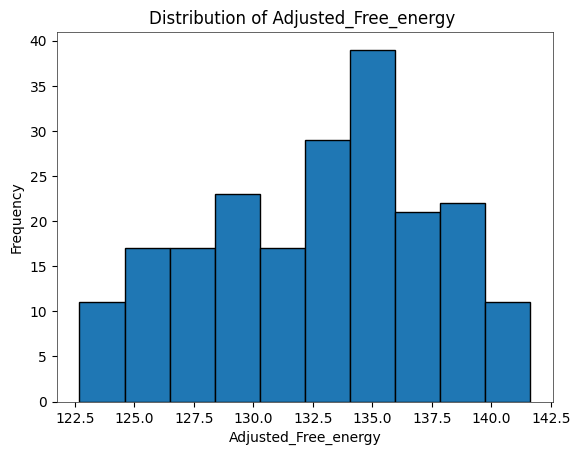

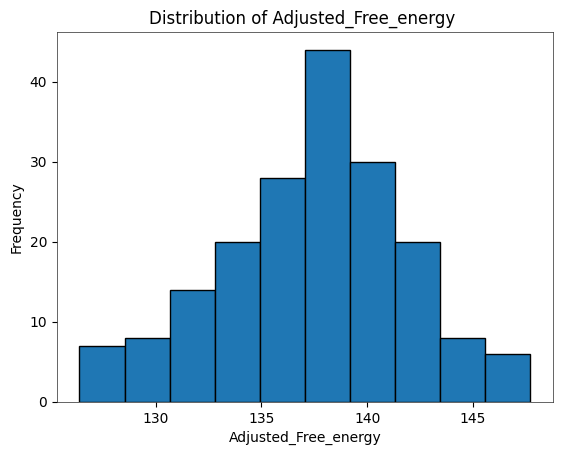

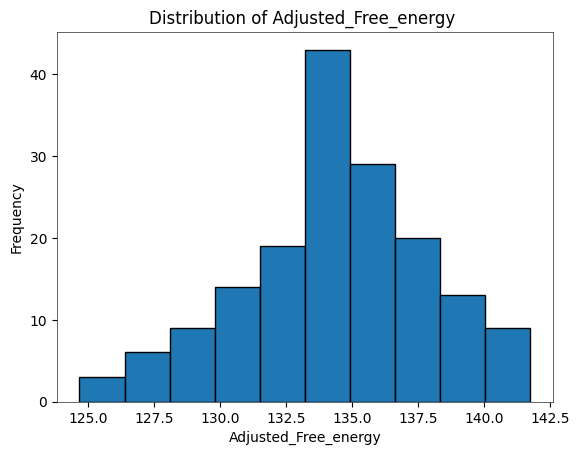

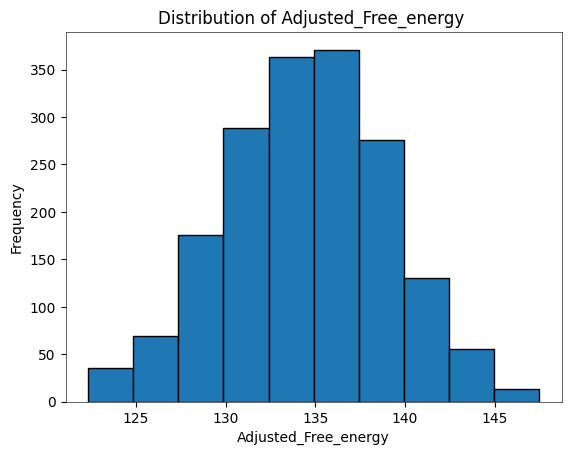

In [139]:
####check the histogram to find the minimum values for each ID_group that needs to be subtracted from the Adjusted_Free_energy to have finite boltzmann weights

# Iterate over each ID_group
for group in ['c', 'd', 'e', 'TG']:
    # Filter the DataFrame by ID_group
    filtered_df = df[df['ID_group_x'] == group]
    
    # Plot the histogram
    plt.hist(filtered_df['Adjusted_Free_energy'], bins=10, edgecolor='black')

    # Add labels and title
    plt.xlabel('Adjusted_Free_energy')
    plt.ylabel('Frequency')
    plt.title('Distribution of Adjusted_Free_energy ')

    # Show the plot
    plt.show()



In [99]:
remove_base_val = dict({'c2':3870, 'c3':2760, 'd': 2050, 'e': 2970, 'TG': 4540})
remove_base_df = pd.DataFrame.from_dict(remove_base_val, orient='index', columns=['Remove_Base_Val'])
remove_base_df.reset_index(inplace=True)
remove_base_df.rename(columns={'index': 'ID_split'}, inplace=True)
remove_base_df


,ID_split,Remove_Base_Val
0,c2,3870
1,c3,2760
2,d,2050
3,e,2970
4,TG,4540


In [100]:
df_base = df_base.merge(remove_base_df, left_on='ID_split_x', right_on='ID_split', how='left')
# df_base = df_base.merge(remove_base_df, left_on='ID_split_y', right_on='ID_split', how='left')

In [101]:
df_base['Remove_Base_Val'] = df_base['Remove_Base_Val'].fillna(df_base['ID_group'].map(remove_base_val))

In [102]:
df_base['Remove_Base_Val_'] = df_base['Remove_Base_Val'].fillna(df_base['ID_split_y'].map(remove_base_val))

In [103]:
df_base['Remove_Base_Val'] = df_base['Remove_Base_Val'].fillna(df_base['Remove_Base_Val_'])
# df_base.drop

In [104]:
df_base.drop(columns=['ID_split', 'Remove_Base_Val_'], inplace=True)

In [105]:
df_base[df_base['ID_split_x'] == 'c3']

,ID,Sequence,Free_energy,Entropy,Enthalpy,Free_DNA_energy,Hang_DNA_energy,ID_split_x,Index,None,ID_group,ID_split_y,F_C_free_dna,Adjusted_Free_energy,Remove_Base_Val
3489,c3_2,"['GT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1621.089388,1593.640675,27.448713,1661.854861,369.350636,c3,2,None,c,c1,2451.086888,2779.672051,2760.0
3490,c3_5,"['GTCGT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1629.862544,1594.406279,35.456266,1662.786193,368.892151,c3,5,None,c,c1,2451.086888,2787.055391,2760.0
3491,c3_0,"['', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1624.556979,1593.440834,31.116145,1662.126501,386.590577,c3,0,None,c,c1,2451.086888,2800.107943,2760.0
3492,c3_7,"['GTCGTAG', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1633.895249,1594.526309,39.368940,1663.148483,368.692874,c3,7,None,c,c1,2451.086888,2790.526527,2760.0
3493,c3_3,"['GTC', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1622.345804,1594.336807,28.008996,1663.123636,370.375548,c3,3,None,c,c1,2451.086888,2780.684603,2760.0
3494,c3_1,"['G', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1621.623211,1594.259296,27.363915,1662.357690,369.459717,c3,1,None,c,c1,2451.086888,2779.812126,2760.0
3495,c3_4,"['GTCG', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1625.631489,1593.910747,31.720742,1662.616107,369.001232,c3,4,None,c,c1,2451.086888,2783.103502,2760.0
3496,c3_8,"['GTCGTAGC', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1634.627437,1594.953976,39.673461,1663.721712,368.520148,c3,8,None,c,c1,2451.086888,2790.512762,2760.0
3497,c3_6,"['GTCGTA', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1632.407549,1594.609331,37.798218,1663.044610,368.772519,c3,6,None,c,c1,2451.086888,2789.222347,2760.0
3498,c3_9,"['GTCGTAGCA', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1630.156294,1594.788023,35.368271,1663.176112,368.639781,c3,9,None,c,c1,2451.086888,2786.706851,2760.0


In [106]:
# df_base['Adjusted_Free_energy_'] = df_base['Adjusted_Free_energy'] - df_base['ID_split_x'].map(remove_base_val)
# df_base['Adjusted_Free_energy_'] = df_base['Adjusted_Free_energy'] - df_base['ID_split_y'].map(remove_base_val)
# df_base['Adjusted_Free_energy_'] = df_base['Adjusted_Free_energy'] - df_base['ID_group'].map(remove_base_val)
# df_base = df_base.reset_index(drop=True)

df_base['Adjusted_Free_energy_'] = df_base['Adjusted_Free_energy'] - df_base['Remove_Base_Val']

In [107]:

df_base.drop('Adjusted_Free_energy', axis=1, inplace=True)
df_base.rename(columns={'Adjusted_Free_energy_': 'Adjusted_Free_energy'}, inplace=True)
df_base.rename(columns={'ID_split_x': 'ID_split'}, inplace=True)

In [76]:
df_base[df_base['ID_split'] == 'c1']

,ID,Sequence,Free_energy,Entropy,Enthalpy,Free_DNA_energy,Hang_DNA_energy,ID_split,Index,None,ID_group,ID_split_y,F_C_free_dna,Remove_Base_Val,Adjusted_Free_energy
2627,c1_6,"['CTGGAG', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1658.141023,1619.170919,38.970104,1688.328824,1477.430474,c1,6,None,c,c2,2447.012547,3870.0,24.255220
2628,c1_6,"['CTGGAG', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1658.141023,1619.170919,38.970104,1688.328824,1477.430474,c1,6,None,c,c3,1338.217410,2760.0,25.460083
2629,c1_3,"['CTG', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1657.948372,1621.219963,36.728409,1689.688308,1476.506276,c1,3,None,c,c2,2447.012547,3870.0,21.778887
2630,c1_3,"['CTG', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1657.948372,1621.219963,36.728409,1689.688308,1476.506276,c1,3,None,c,c3,1338.217410,2760.0,22.983750
2631,c1_7,"['CTGGAGA', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1660.831009,1618.472353,42.358656,1687.151999,1477.935733,c1,7,None,c,c2,2447.012547,3870.0,28.627290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,c1_88,['CTGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGCAAG...,1667.026019,1623.132392,43.893627,1692.601047,1475.697057,c1,88,None,c,c3,1338.217410,2760.0,28.339439
2805,c1_89,['CTGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGCAAG...,1663.494994,1622.722584,40.772410,1691.834467,1475.544162,c1,89,None,c,c2,2447.012547,3870.0,24.217236
2806,c1_89,['CTGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGCAAG...,1663.494994,1622.722584,40.772410,1691.834467,1475.544162,c1,89,None,c,c3,1338.217410,2760.0,25.422099
2807,c1_90,['CTGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGCAAG...,1660.646505,1622.921517,37.724988,1691.768843,1491.677979,c1,90,None,c,c2,2447.012547,3870.0,37.568187


In [141]:
beta=1

# Subtract 1600 from the 'Free_energy' column
# df['Adjusted_Free_energy'] = df['Free_energy'] - 1580
# df['Adjusted_Free_energy'] = df['Free_energy'] - df['Free_DNA_energy']

# df['Adjusted_Free_energy'] = df['Enthalpy']
# Calculate the Boltzmann weight
df['Boltzmann_weight'] = np.exp(-beta * df['Adjusted_Free_energy'])
# df_base['Boltzmann_weight'] = np.exp(-beta * df_base['Adjusted_Free_energy'])

In [58]:
df

,ID,Sequence,Free_energy,Entropy,Enthalpy,Free_DNA_energy,Hang_DNA_energy,ID_split,Index,None,ID_group_x,repeated_part_Energy,Hang_DNA_Energy,F_C_free_dna,ID_group_y,Tetramer_Energy,Adjusted_Free_energy,Boltzmann_weight
0,IAT_4,"['GAAT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1655.321722,1616.312390,39.009332,1683.808655,1809.845828,IAT,4,None,TG,1496.825573,1813.032825,2786.999779,TG,158.496149,-35.470805,2.539657e+15
1,IAT_6,"['GAATTC', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1656.030322,1616.900410,39.129913,1685.382985,1810.550365,IAT,6,None,TG,1496.825573,1813.737874,2786.999779,TG,159.204749,-34.057156,6.177817e+14
2,IAT_1,"['G', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1655.775947,1616.510721,39.265226,1684.860582,1809.190592,IAT,1,None,TG,1496.825573,1812.381236,2786.999779,TG,158.950374,-35.668169,3.093778e+15
3,IAT_2,"['GA', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1657.104667,1617.481609,39.623058,1684.794958,1809.695851,IAT,2,None,TG,1496.825573,1812.885555,2786.999779,TG,160.279093,-33.835131,4.947785e+14
4,IAT_5,"['GAATT', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...",1654.802386,1615.223140,39.579246,1683.897130,1810.689976,IAT,5,None,TG,1496.825573,1813.872198,2786.999779,TG,157.976812,-35.150769,1.844102e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,GT_108,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1657.423062,1624.252149,33.170913,1693.885765,1817.613269,GT,108,None,TG,1496.825573,1820.789922,2798.053814,TG,160.597489,-36.666403,8.394916e+15
2329,GT_107,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1661.877690,1625.401872,36.475818,1695.062589,1817.613269,GT,107,None,TG,1496.825573,1820.789922,2798.053814,TG,165.052117,-32.211775,9.758795e+13
2330,GT_106,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1663.272339,1625.779177,37.493162,1695.151064,1817.481441,GT,106,None,TG,1496.825573,1820.658817,2798.053814,TG,166.446766,-30.948232,2.758331e+13
2331,GT_109,['GAATTCGAGCTCGCCCGGCCGGGGATCGCTCGGGTCGGGTTTAG...,1659.742299,1625.880095,33.862204,1695.628480,1817.613269,GT,109,None,TG,1496.825573,1820.789922,2798.053814,TG,162.916725,-34.347166,8.256288e+14


In [142]:
grouped_df = df.groupby('ID_split')['Boltzmann_weight'].sum().reset_index() ### without the paritition function

# grouped_df = df_base.groupby(['ID_split', 'ID_split_y'])['Boltzmann_weight'].sum().reset_index() ### without the paritition function


# Print the resulting DataFrame
print(grouped_df)

      ID_split  Boltzmann_weight
0        ANISO      5.392699e-06
1         ANNA      8.184715e-06
2          END      3.104200e-07
3         EXAT      4.375867e-06
4         EXGC      3.119496e-07
5           GT      1.357588e-06
6          IAT      3.455715e-05
7          IGC      3.087676e-07
8         NOTA      1.680669e-08
9           TG      3.185997e-06
10        TG_T      4.456002e-08
11        TRGC      5.103435e-10
12        TR_5      7.501937e-08
13         TTT      1.986340e-07
14          c1      8.710088e-07
15          c2      1.095979e-05
16          c3      6.714453e-06
17          d1      1.333000e-07
18          d2      1.361994e-07
19          d3      2.811741e-10
20          d4      3.075704e-09
21          d5      7.363958e-11
22          e1      8.710088e-07
23          e2      3.168716e-09
24          e3      5.402500e-08
25  three_four      8.884865e-10
26    two_zero      1.095841e-07


In [110]:
grouped_df[grouped_df['ID_split']=='c1']

,ID_split,ID_split_y,Boltzmann_weight
28,c1,c2,0.000014
29,c1,c3,0.000004


In [111]:
grouped_df['ID_top'] = grouped_df['ID_split'] + '_' + grouped_df['ID_split_y']
grouped_df['ID_bottom'] = grouped_df['ID_split_y']+'_'+ grouped_df['ID_split']

In [112]:
grouped_df_right = grouped_df.copy()

In [113]:
grouped_df_merged = grouped_df.merge(grouped_df_right, left_on='ID_top', right_on='ID_bottom', how='left')
grouped_df_merged

,ID_split_x,ID_split_y_x,Boltzmann_weight_x,ID_top_x,ID_bottom_x,ID_split_y,ID_split_y_y,Boltzmann_weight_y,ID_top_y,ID_bottom_y
0,ANISO,TG,1.852395e-07,ANISO_TG,TG_ANISO,TG,ANISO,9.707705e-05,TG_ANISO,ANISO_TG
1,ANNA,TG,4.282198e-07,ANNA_TG,TG_ANNA,TG,ANNA,5.615208e-06,TG_ANNA,ANNA_TG
2,END,TG,2.299500e-08,END_TG,TG_END,TG,END,2.303467e-07,TG_END,END_TG
3,EXAT,TG,1.181127e-07,EXAT_TG,TG_EXAT,TG,EXAT,5.067914e-05,TG_EXAT,EXAT_TG
4,EXGC,TG,2.008286e-08,EXGC_TG,TG_EXGC,TG,EXGC,7.069200e-06,TG_EXGC,EXGC_TG
5,GT,TG,3.214860e-07,GT_TG,TG_GT,TG,GT,2.543198e-09,TG_GT,GT_TG
6,IAT,TG,1.003834e-06,IAT_TG,TG_IAT,TG,IAT,1.597531e-04,TG_IAT,IAT_TG
7,IGC,TG,2.010218e-08,IGC_TG,TG_IGC,TG,IGC,2.902552e-06,TG_IGC,IGC_TG
8,NOTA,TG,2.613046e-09,NOTA_TG,TG_NOTA,TG,NOTA,1.910212e-08,TG_NOTA,NOTA_TG
9,TG,ANISO,9.707705e-05,TG_ANISO,ANISO_TG,ANISO,TG,1.852395e-07,ANISO_TG,TG_ANISO


In [114]:
grouped_df_merged = grouped_df_merged[~grouped_df_merged['ID_split_x'].str.contains('c1|d1|e1|TG')]

In [115]:
grouped_df_merged = grouped_df_merged.drop(['ID_top_y', 'ID_bottom_y', 'ID_split_y', 'ID_split_y_y', 'ID_bottom_x', 'ID_top_x'], axis=1)
grouped_df_merged

,ID_split_x,ID_split_y_x,Boltzmann_weight_x,Boltzmann_weight_y
0,ANISO,TG,1.852395e-07,9.707705e-05
1,ANNA,TG,4.282198e-07,5.615208e-06
2,END,TG,2.299500e-08,2.303467e-07
3,EXAT,TG,1.181127e-07,5.067914e-05
4,EXGC,TG,2.008286e-08,7.069200e-06
5,GT,TG,3.214860e-07,2.543198e-09
6,IAT,TG,1.003834e-06,1.597531e-04
7,IGC,TG,2.010218e-08,2.902552e-06
8,NOTA,TG,2.613046e-09,1.910212e-08
25,TRGC,TG,5.624203e-11,2.627914e-09


In [50]:
'Sim Energy (KT)'

'Sim Energy (KT)'

In [116]:
grouped_df_merged['Sim Energy (KT)']= -np.log(grouped_df_merged['Boltzmann_weight_x'] / grouped_df_merged['Boltzmann_weight_y'])
grouped_df_merged['ID'] =  grouped_df_merged['ID_split_y_x'] + '/' + grouped_df_merged['ID_split_x'] 

In [117]:
Sim_df = grouped_df_merged.drop(['Boltzmann_weight_x', 'Boltzmann_weight_y',  'ID_split_x', 'ID_split_y_x'], axis=1)
Sim_df

,Sim Energy (KT),ID
0,6.261611,TG/ANISO
1,2.573597,TG/ANNA
2,2.304309,TG/END
3,6.061630,TG/EXAT
4,5.863636,TG/EXGC
5,-4.839532,TG/GT
6,5.069802,TG/IAT
7,4.972518,TG/IGC
8,1.989283,TG/NOTA
25,3.844281,TG/TRGC


In [143]:
pivot_df = grouped_df.pivot(columns='ID_split', values='Boltzmann_weight')
pivot_df.ffill(inplace=True)
pivot_df.bfill(inplace=True)
pivot_df

ID_split,ANISO,ANNA,END,EXAT,EXGC,GT,IAT,IGC,NOTA,TG,...,d1,d2,d3,d4,d5,e1,e2,e3,three_four,two_zero
0,0.000005,0.000008,3.104200e-07,0.000004,3.119496e-07,0.000001,0.000035,3.087676e-07,1.680669e-08,0.000003,...,1.333000e-07,1.361994e-07,2.811741e-10,3.075704e-09,7.363958e-11,8.710088e-07,3.168716e-09,5.402500e-08,8.884865e-10,1.095841e-07
1,0.000005,0.000008,3.104200e-07,0.000004,3.119496e-07,0.000001,0.000035,3.087676e-07,1.680669e-08,0.000003,...,1.333000e-07,1.361994e-07,2.811741e-10,3.075704e-09,7.363958e-11,8.710088e-07,3.168716e-09,5.402500e-08,8.884865e-10,1.095841e-07
2,0.000005,0.000008,3.104200e-07,0.000004,3.119496e-07,0.000001,0.000035,3.087676e-07,1.680669e-08,0.000003,...,1.333000e-07,1.361994e-07,2.811741e-10,3.075704e-09,7.363958e-11,8.710088e-07,3.168716e-09,5.402500e-08,8.884865e-10,1.095841e-07
3,0.000005,0.000008,3.104200e-07,0.000004,3.119496e-07,0.000001,0.000035,3.087676e-07,1.680669e-08,0.000003,...,1.333000e-07,1.361994e-07,2.811741e-10,3.075704e-09,7.363958e-11,8.710088e-07,3.168716e-09,5.402500e-08,8.884865e-10,1.095841e-07
4,0.000005,0.000008,3.104200e-07,0.000004,3.119496e-07,0.000001,0.000035,3.087676e-07,1.680669e-08,0.000003,...,1.333000e-07,1.361994e-07,2.811741e-10,3.075704e-09,7.363958e-11,8.710088e-07,3.168716e-09,5.402500e-08,8.884865e-10,1.095841e-07
5,0.000005,0.000008,3.104200e-07,0.000004,3.119496e-07,0.000001,0.000035,3.087676e-07,1.680669e-08,0.000003,...,1.333000e-07,1.361994e-07,2.811741e-10,3.075704e-09,7.363958e-11,8.710088e-07,3.168716e-09,5.402500e-08,8.884865e-10,1.095841e-07
6,0.000005,0.000008,3.104200e-07,0.000004,3.119496e-07,0.000001,0.000035,3.087676e-07,1.680669e-08,0.000003,...,1.333000e-07,1.361994e-07,2.811741e-10,3.075704e-09,7.363958e-11,8.710088e-07,3.168716e-09,5.402500e-08,8.884865e-10,1.095841e-07
7,0.000005,0.000008,3.104200e-07,0.000004,3.119496e-07,0.000001,0.000035,3.087676e-07,1.680669e-08,0.000003,...,1.333000e-07,1.361994e-07,2.811741e-10,3.075704e-09,7.363958e-11,8.710088e-07,3.168716e-09,5.402500e-08,8.884865e-10,1.095841e-07
8,0.000005,0.000008,3.104200e-07,0.000004,3.119496e-07,0.000001,0.000035,3.087676e-07,1.680669e-08,0.000003,...,1.333000e-07,1.361994e-07,2.811741e-10,3.075704e-09,7.363958e-11,8.710088e-07,3.168716e-09,5.402500e-08,8.884865e-10,1.095841e-07
9,0.000005,0.000008,3.104200e-07,0.000004,3.119496e-07,0.000001,0.000035,3.087676e-07,1.680669e-08,0.000003,...,1.333000e-07,1.361994e-07,2.811741e-10,3.075704e-09,7.363958e-11,8.710088e-07,3.168716e-09,5.402500e-08,8.884865e-10,1.095841e-07


In [144]:
merged_df = pd.merge(grouped_df, pivot_df, left_index=True, right_index=True, suffixes=('_grouped', '_pivot'))
# merged_df

# merged_df = pd.merge(_lowest_grouped_df, pivot_df, left_index=True, right_index=True, suffixes=('_grouped', '_pivot'))


In [145]:
merged_df['c1_'] = -np.log(merged_df['c1'] / merged_df['Boltzmann_weight'])
merged_df['c2_'] = -np.log(merged_df['c2'] / merged_df['Boltzmann_weight'])
merged_df['c3_'] = -np.log(merged_df['c3'] / merged_df['Boltzmann_weight'])
merged_df['d1_'] = -np.log(merged_df['d1'] / merged_df['Boltzmann_weight'])
merged_df['d2_'] = -np.log(merged_df['d2'] / merged_df['Boltzmann_weight'])
merged_df['d3_'] = -np.log(merged_df['d3'] / merged_df['Boltzmann_weight'])
merged_df['d4_'] = -np.log(merged_df['d4'] / merged_df['Boltzmann_weight'])
merged_df['d5_'] = -np.log(merged_df['d5'] / merged_df['Boltzmann_weight'])
merged_df['e1_'] = -np.log(merged_df['e1'] / merged_df['Boltzmann_weight'])
merged_df['e2_'] = -np.log(merged_df['e2'] / merged_df['Boltzmann_weight'])
merged_df['e3_'] = -np.log(merged_df['e3'] / merged_df['Boltzmann_weight'])
merged_df['three_four_'] = -np.log(merged_df['three_four'] / merged_df['Boltzmann_weight'])
merged_df['two_zero_'] = -np.log(merged_df['two_zero'] / merged_df['Boltzmann_weight'])

merged_df['ANISO_'] = -np.log(merged_df['ANISO'] / merged_df['Boltzmann_weight'])
merged_df['ANNA_'] = -np.log(merged_df['ANNA'] / merged_df['Boltzmann_weight'])
merged_df['END_'] = -np.log(merged_df['END'] / merged_df['Boltzmann_weight'])
merged_df['EXAT_'] = -np.log(merged_df['EXAT'] / merged_df['Boltzmann_weight'])
merged_df['EXGC_'] = -np.log(merged_df['EXGC'] / merged_df['Boltzmann_weight'])
merged_df['GT_'] = -np.log(merged_df['GT'] / merged_df['Boltzmann_weight'])
merged_df['IAT_'] = -np.log(merged_df['IAT'] / merged_df['Boltzmann_weight'])
merged_df['IGC_'] = -np.log(merged_df['IGC'] / merged_df['Boltzmann_weight'])
merged_df['NOTA_'] = -np.log(merged_df['NOTA'] / merged_df['Boltzmann_weight'])
merged_df['TG_'] = -np.log(merged_df['TG'] / merged_df['Boltzmann_weight'])
merged_df['TG_T_'] = -np.log(merged_df['TG_T'] / merged_df['Boltzmann_weight'])
merged_df['TRGC_'] = -np.log(merged_df['TRGC'] / merged_df['Boltzmann_weight'])
merged_df['TR_5_'] = -np.log(merged_df['TR_5'] / merged_df['Boltzmann_weight'])
merged_df['TTT_'] = -np.log(merged_df['TTT'] / merged_df['Boltzmann_weight'])

merged_df.drop(columns=['c1', 'c2', 'c3',
 'd1', 'd2', 'd3', 'd4','d5', 'e1', 'e2', 'e3', 'three_four', 'two_zero',
 'ANISO', 'ANNA', 'END', 'EXAT', 'EXGC', 'GT', 
 'IAT', 'IGC', 'NOTA', 'TG', 'TG_T', 'TRGC', 'TR_5', 'TTT'], inplace=True)

In [146]:
c1_data  = merged_df[merged_df['ID_split']=='c1']
c1_data[['c2_', 'c3_']].values[0]

d1_data  = merged_df[merged_df['ID_split']=='d1']
d1_data[['d2_', 'd3_', 'd4_', 'd5_']].values[0]

e1_data  = merged_df[merged_df['ID_split']=='e1']
e1_data[['e2_', 'e3_']].values[0]

TG_data_1  = merged_df[merged_df['ID_split']=='TG']
TG_data_1[['TG_T_', 'TR_5_', 'TRGC_',]].values[0]

TG_data_2  = merged_df[merged_df['ID_split']=='TG']
TG_data_2[['ANISO_', 'TTT_', 'NOTA_', 'EXAT_', 'EXGC_', 'IAT_', 'IGC_', 'END_', 'ANNA_', 'three_four_', 'two_zero_']].values[0]




array([-0.52628072,  2.77505655,  5.24474375, -0.31733956,  2.32367887,
       -2.38384924,  2.33393145,  2.32859421, -0.94350322,  8.18475629,
        3.36982849])

In [147]:
c1_dict = c1_data[['c2_', 'c3_']].iloc[0].to_dict()
c1_key_mapping = {
    'c2_': 'c1/c2',
    'c3_': 'c1/c3'
}

# Create a new dictionary with renamed keys
c1_dict_new = {c1_key_mapping.get(k, k): v for k, v in c1_dict.items()}

# Print the resulting dictionary
print(c1_dict_new)


d1_dict = d1_data[['d2_', 'd3_', 'd4_', 'd5_']].iloc[0].to_dict()
d1_key_mapping = {
    'd2_': 'd1/d2',
    'd3_': 'd1/d3',
    'd4_': 'd1/d4',
    'd5_': 'd1/d5'
}

# Create a new dictionary with renamed keys
d1_dict_new = {d1_key_mapping.get(k, k): v for k, v in d1_dict.items()}

e1_dict = e1_data[['e2_', 'e3_']].iloc[0].to_dict()
e1_key_mapping = {
    'e2_': 'e1/e2',
    'e3_': 'e1/e3'
}

# Create a new dictionary with renamed keys
e1_dict_new = {e1_key_mapping.get(k, k): v for k, v in e1_dict.items()}


print(d1_dict_new)
print(e1_dict_new)


{'c1/c2': -2.532336291772476, 'c1/c3': -2.04236561728075}
{'d1/d2': -0.02151810489833187, 'd1/d3': 6.161383406001372, 'd1/d4': 3.7690681109197017, 'd1/d5': 7.501174687747793}
{'e1/e2': 5.616325469609673, 'e1/e3': 2.780205151362429}


In [148]:
TG_dict_1 = TG_data_1[['TG_T_', 'TR_5_', 'TRGC_']].iloc[0].to_dict()
TG_key_mapping_1 = {
    'TG_T_': 'TG/TG_T',
    'TR_5_': 'TG/TR_5',
    'TRGC_': 'TG/TRGC'
}

# Create a new dictionary with renamed keys
TG_dict_new_1 = {TG_key_mapping_1.get(k, k): v for k, v in TG_dict_1.items()}
TG_dict_new_1

{'TG/TG_T': 4.269683369987738,
 'TG/TR_5': 3.748774135534397,
 'TG/TRGC': 8.73919170563463}

In [149]:
TG_dict_2 = TG_data_2[['ANISO_', 'TTT_', 'NOTA_', 'EXAT_', 'EXGC_', 'IAT_', 'IGC_', 'END_', 'ANNA_', 'three_four_', 'two_zero_']].iloc[0].to_dict()
TG_key_mapping_2 = {
    'ANISO_': 'TG/ANISO',
    'TTT_': 'TG/TTT',
    'NOTA_': 'TG/NOTA',
    'EXAT_': 'TG/EXAT',
    'EXGC_': 'TG/EXGC',
    'IAT_': 'TG/IAT',
    'IGC_': 'TG/IGC',
    'END_': 'TG/END',
    'ANNA_': 'TG/ANNA',
    'three_four_': 'TG/34r',
    'two_zero_': 'TG/20r'
}

# Create a new dictionary with renamed keys
TG_dict_new_2 = {TG_key_mapping_2.get(k, k): v for k, v in TG_dict_2.items()}
TG_dict_new_2


{'TG/ANISO': -0.5262807198783374,
 'TG/TTT': 2.775056554139183,
 'TG/NOTA': 5.24474375145087,
 'TG/EXAT': -0.3173395578362371,
 'TG/EXGC': 2.3236788678054543,
 'TG/IAT': -2.383849239716025,
 'TG/IGC': 2.3339314535487925,
 'TG/END': 2.328594209229015,
 'TG/ANNA': -0.9435032176257058,
 'TG/34r': 8.184756287439578,
 'TG/20r': 3.3698284946410006}

In [150]:
def calculate_delta_energy(rel_binding_affinity):
   return -np.log(rel_binding_affinity) ##in KT

In [151]:
c1_dict_new_exp = {'c1/c2': calculate_delta_energy(rba['c2']), 
                   'c1/c3': calculate_delta_energy(rba['c3'])}

d1_dict_new_exp = {'d1/d2': calculate_delta_energy(rba['d2']),
                     'd1/d3': calculate_delta_energy(rba['d3']),
                     'd1/d4': calculate_delta_energy(rba['d4']),
                     'd1/d5': calculate_delta_energy(rba['d5'])}

e1_dict_new_exp = {'e1/e2': calculate_delta_energy(rba['e2']),
                        'e1/e3': calculate_delta_energy(rba['e3'])}

print(c1_dict_new_exp)
print(d1_dict_new_exp) 
print(e1_dict_new_exp)


{'c1/c2': -0.9162907318741551, 'c1/c3': -0.4054651081081644}
{'d1/d2': 1.8325814637483102, 'd1/d3': 1.9661128563728327, 'd1/d4': 2.120263536200091, 'd1/d5': 2.3025850929940455}
{'e1/e2': 1.8971199848858813, 'e1/e3': 2.3025850929940455}


In [152]:

TG_key_mapping_1_exp = {
    'TG': 'TG/TG',
    'TG_T': 'TG/TG_T',
    'GT': 'TG/GT',
    'TR_5': 'TG/TR_5',
    'TRGC': 'TG/TRGC'
}

converted_energy_sh_tr = {TG_key_mapping_1_exp.get(k, k): v*(1.689 * 10**-3) for k, v in energy_sh_tr.items()}


converted_energy_sh_tr

{'TG/TG': 0.0,
 'TG/GT': 0.0,
 'TG/TG_T': 3.29355,
 'TG/TR_5': 3.2091000000000003,
 'TG/TRGC': 2.1957000000000004}

In [153]:

TG_key_mapping_2_exp = {'TG': 'TG/TG',
                        'ANISO': 'TG/ANISO', 
                        'TTT': 'TG/TTT',
                        'NOTA': 'TG/NOTA',
                        'EXAT': 'TG/EXAT',
                        'EXGC': 'TG/EXGC',
                        'IAT': 'TG/IAT',
                        'IGC': 'TG/IGC',
                        'END': 'TG/END',
                        'ANNA': 'TG/ANNA',
                        'three_four': 'TG/34r',
                        'two_zero': 'TG/20r'}

converted_energy_sh_tr_1 = {TG_key_mapping_2_exp.get(k, k): v*(1.689 * 10**-3) for k, v in energy_sh_tr_1.items()}

converted_energy_sh_tr_1

{'TG/TG': 0.0,
 'TG/ANISO': 1.26675,
 'TG/TTT': 1.5201000000000002,
 'TG/NOTA': 2.7024000000000004,
 'TG/EXAT': 1.1823000000000001,
 'TG/EXGC': 2.6179500000000004,
 'TG/IAT': 0.8445000000000001,
 'TG/IGC': 2.1957000000000004,
 'TG/END': 2.7024000000000004,
 'TG/ANNA': 0.25335,
 'TG/34r': 3.3780000000000006,
 'TG/20r': 2.6179500000000004}

In [154]:
Exp_3 = pd.DataFrame.from_dict(converted_energy_sh_tr_1, orient='index', columns=['Exp Energy (KT)'])
Exp_2 = pd.DataFrame.from_dict(converted_energy_sh_tr, orient='index', columns=['Exp Energy (KT)'])
Exp_1_c = pd.DataFrame.from_dict(c1_dict_new_exp, orient='index', columns=['Exp Energy (KT)'])
Exp_1_d = pd.DataFrame.from_dict(d1_dict_new_exp, orient='index', columns=['Exp Energy (KT)'])
Exp_1_e = pd.DataFrame.from_dict(e1_dict_new_exp, orient='index', columns=['Exp Energy (KT)'])
Exp_df = pd.concat([Exp_1_c, Exp_1_d, Exp_1_e, Exp_2, Exp_3], axis=0)


In [155]:
Sim_c = pd.DataFrame.from_dict(c1_dict_new, orient='index', columns=['Sim Energy (KT)'])
Sim_d = pd.DataFrame.from_dict(d1_dict_new, orient='index', columns=['Sim Energy (KT)'])
Sim_e = pd.DataFrame.from_dict(e1_dict_new, orient='index', columns=['Sim Energy (KT)'])
Sim_TG_1 = pd.DataFrame.from_dict(TG_dict_new_1, orient='index', columns=['Sim Energy (KT)'])
Sim_TG_2 = pd.DataFrame.from_dict(TG_dict_new_2, orient='index', columns=['Sim Energy (KT)'])
Sim_df = pd.concat([Sim_c, Sim_d, Sim_e, Sim_TG_1, Sim_TG_2], axis=0)
Sim_df


,Sim Energy (KT)
c1/c2,-2.532336
c1/c3,-2.042366
d1/d2,-0.021518
d1/d3,6.161383
d1/d4,3.769068
d1/d5,7.501175
e1/e2,5.616325
e1/e3,2.780205
TG/TG_T,4.269683
TG/TR_5,3.748774


In [156]:
Exp_df['ID']= Exp_df.index
Sim_df['ID']= Sim_df.index

In [202]:
Sim_df['ID'] = Sim_df['ID'].replace({'TG/three_four': 'TG/34r', 'TG/two_zero': 'TG/20r'}, regex=True)

In [157]:
final_df = pd.merge(Sim_df,Exp_df, on='ID', how='left')

# Print the resulting DataF-rame
print(final_df)

    Sim Energy (KT)        ID  Exp Energy (KT)
0         -2.532336     c1/c2        -0.916291
1         -2.042366     c1/c3        -0.405465
2         -0.021518     d1/d2         1.832581
3          6.161383     d1/d3         1.966113
4          3.769068     d1/d4         2.120264
5          7.501175     d1/d5         2.302585
6          5.616325     e1/e2         1.897120
7          2.780205     e1/e3         2.302585
8          4.269683   TG/TG_T         3.293550
9          3.748774   TG/TR_5         3.209100
10         8.739192   TG/TRGC         2.195700
11        -0.526281  TG/ANISO         1.266750
12         2.775057    TG/TTT         1.520100
13         5.244744   TG/NOTA         2.702400
14        -0.317340   TG/EXAT         1.182300
15         2.323679   TG/EXGC         2.617950
16        -2.383849    TG/IAT         0.844500
17         2.333931    TG/IGC         2.195700
18         2.328594    TG/END         2.702400
19        -0.943503   TG/ANNA         0.253350
20         8.

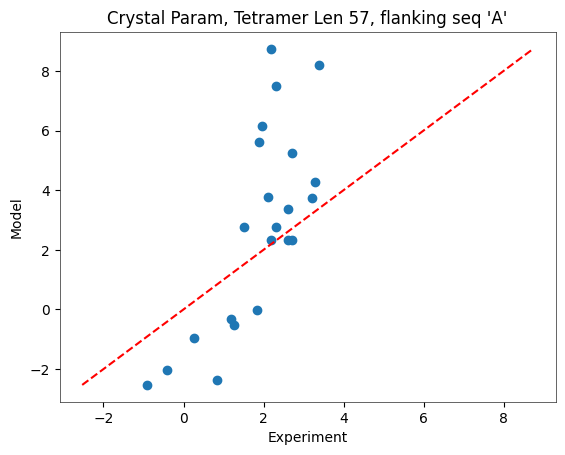

In [158]:
plt.scatter(final_df['Exp Energy (KT)'], final_df['Sim Energy (KT)'])
plt.xlabel('Experiment')
plt.ylabel('Model')
plt.title("Crystal Param, Tetramer Len 57, flanking seq 'A'")
# Plot the x=y line
min_val = min(final_df['Exp Energy (KT)'].min(), final_df['Sim Energy (KT)'].min())
max_val = max(final_df['Exp Energy (KT)'].max(), final_df['Sim Energy (KT)'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.show()

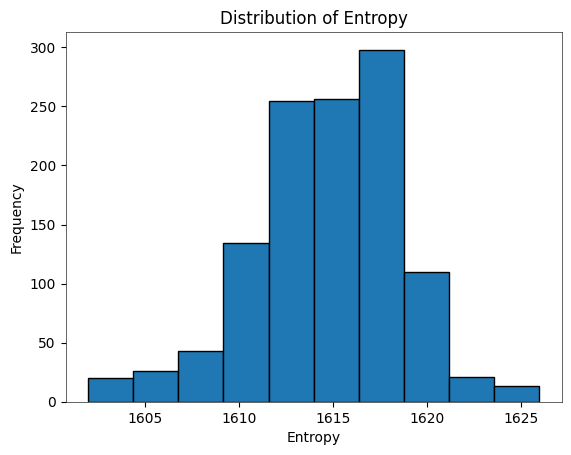

In [175]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.hist(df['Entropy'], bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.title('Distribution of Entropy')

# Show the plot
plt.show()

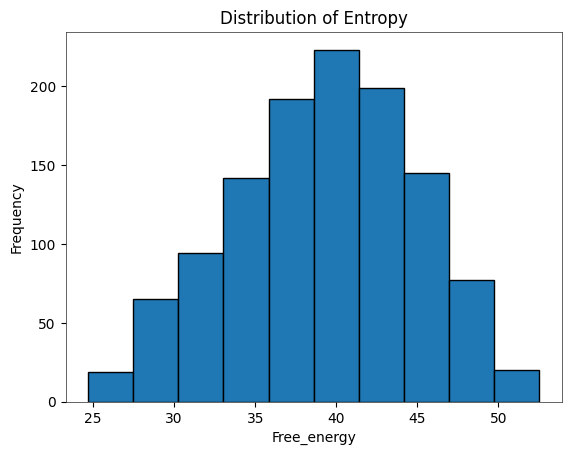

In [176]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.hist(df['Enthalpy'], bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Free_energy')
plt.ylabel('Frequency')
plt.title('Distribution of Entropy')

# Show the plot
plt.show()

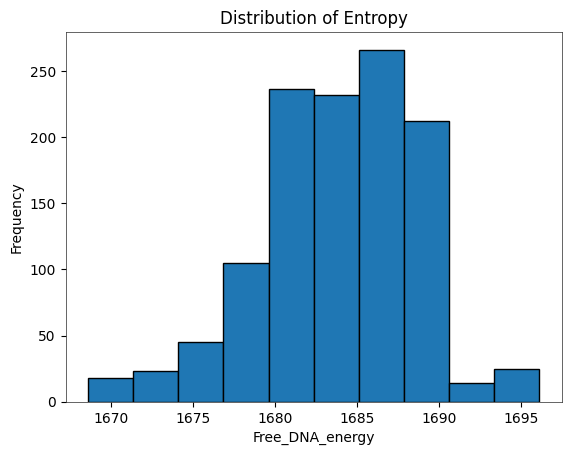

In [177]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.hist(df['Free_DNA_energy'], bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Free_DNA_energy')
plt.ylabel('Frequency')
plt.title('Distribution of Entropy')

# Show the plot
plt.show()

In [92]:
result = np.exp(-1650)
formatted_result = f"{result:.2e}"
print(formatted_result)

0.00e+00


In [94]:
from decimal import Decimal, getcontext

# Set the precision high enough to handle very small values
getcontext().prec = 10

# Calculate exp(-1650) using Decimal
result = Decimal(-1650).exp()

print(result)

2.594805798E-717


In [28]:
delta_energy_values = dict()
for key, value in rba.items():
    delta_energy = calculate_delta_energy(value)
    delta_energy_values[key] = delta_energy

delta_energy_values

{'c1': -0.0,
 'c2': -0.9162907318741551,
 'c3': -0.4054651081081644,
 'd1': -0.0,
 'd2': 1.8325814637483102,
 'd3': 1.9661128563728327,
 'd4': 2.120263536200091,
 'd5': 2.3025850929940455,
 'e1': -0.0,
 'e2': 1.8971199848858813,
 'e3': 2.3025850929940455}